# DTW-Based Cleaning of Gait Database

This notebook :
1. Load patient time-series via Data_loader
2. Compute DTW distance matrix across segments.
3. Summarize distances and flag outlier segments.
4. Reconstruct a cleaned dataset.
5. Display the DTW's histograms per patient (before a/o clenned - compares)


In [1]:
import os
import sys
import re
import pandas as pd
import numpy as np
import json
os.chdir('..')
sys.path.insert(0, os.getcwd())
from DTW import dtw_not_segmented, dtw_ns_normalized, dtw_di2
from Data_loader import base_folders
output_base = "DTW2"
os.makedirs(output_base, exist_ok=True)
import matplotlib.pyplot as plt

In [3]:
# Run DTW
#groups = ["G01", "G03"]
groups = ["G03"]
all_stats = {}
for grp in groups:
    print(f"\n=== Processing DTW-DI for group {grp} ===")
    df_stats = dtw_di2(
        group_code   = grp,
        output_base  = output_base,
        verbose      = True,
        signal_col='Ankle Dorsiflexion RT (deg)',
        downsample_factor=4,
    )
    all_stats[grp] = df_stats
    


=== Processing DTW-DI for group G03 ===


Patients:   0%|          | 0/35 [00:00<?, ?it/s]

[INFO] S009 S009_G03_D01_B01_T01: cycles=258, stats={'mean': 1.3821721546333463, 'median': 1.0959862487050203, 'std': 0.9938062396510882, 'n_pairs': 33153}
[INFO] S009 S009_G03_D01_B01_T02: cycles=264, stats={'mean': 1.5038621009238624, 'median': 1.0318553016151686, 'std': 1.4398653007467592, 'n_pairs': 34716}
[INFO] S009 S009_G03_D01_B01_T03: cycles=254, stats={'mean': 1.3194618439047874, 'median': 1.0407074778717105, 'std': 0.9439119099981919, 'n_pairs': 32131}
[INFO] S009 S009_G03_D01_B02_T01: cycles=258, stats={'mean': 1.4838694377400565, 'median': 0.9814935961179457, 'std': 1.53775762933138, 'n_pairs': 33153}
[INFO] S009 S009_G03_D01_B02_T02: cycles=257, stats={'mean': 1.4422098862782429, 'median': 0.9379097346963154, 'std': 1.6371115980107338, 'n_pairs': 32896}
[INFO] S009 S009_G03_D01_B02_T03: cycles=280, stats={'mean': 2.4913857821788317, 'median': 1.3530732770199756, 'std': 2.5264102461433784, 'n_pairs': 39060}
[INFO] S009 S009_G03_D01_B03_T01: cycles=275, stats={'mean': 2.113

Patients:   3%|▎         | 1/35 [00:53<30:10, 53.24s/it]

[INFO] S009 S009_G03_D02_B03_T03: cycles=241, stats={'mean': 1.2474792414445357, 'median': 1.0409832047023193, 'std': 0.5867423084679044, 'n_pairs': 28920}
[INFO] S013 S013_G03_D01_B01_T01: cycles=91, stats={'mean': 0.7128126258211159, 'median': 0.6757739060583474, 'std': 0.25853476653062035, 'n_pairs': 4095}
[INFO] S013 S013_G03_D01_B01_T02: cycles=124, stats={'mean': 1.4521553990909712, 'median': 0.6769536260370932, 'std': 2.4721367062993025, 'n_pairs': 7626}
[INFO] S013 S013_G03_D01_B01_T03: cycles=251, stats={'mean': 0.7041111072841582, 'median': 0.6242597613793379, 'std': 0.7095393084641612, 'n_pairs': 31375}
[INFO] S013 S013_G03_D01_B02_T01: cycles=251, stats={'mean': 0.6961762022204132, 'median': 0.6200001549557387, 'std': 0.7515844472034011, 'n_pairs': 31375}
[INFO] S013 S013_G03_D01_B02_T02: cycles=248, stats={'mean': 0.6134537643551724, 'median': 0.6016513132389651, 'std': 0.20601360533040133, 'n_pairs': 30628}
[INFO] S013 S013_G03_D01_B02_T03: cycles=248, stats={'mean': 0.62

Patients:   6%|▌         | 2/35 [01:41<27:49, 50.59s/it]

[INFO] S013 S013_G03_D02_B03_T03: cycles=247, stats={'mean': 0.8571978645664643, 'median': 0.829862980898333, 'std': 0.2457776777856942, 'n_pairs': 30381}
[INFO] S019 S019_G03_D01_B01_T01: cycles=236, stats={'mean': 0.6649249666203816, 'median': 0.6487017644249464, 'std': 0.22863485451161508, 'n_pairs': 27730}
[INFO] S019 S019_G03_D01_B01_T02: cycles=242, stats={'mean': 0.6503974486369462, 'median': 0.6294417351984817, 'std': 0.22242965438899537, 'n_pairs': 29161}
[INFO] S019 S019_G03_D01_B01_T03: cycles=239, stats={'mean': 0.6508173786505683, 'median': 0.6428583917385151, 'std': 0.18562001010874737, 'n_pairs': 28441}
[INFO] S019 S019_G03_D01_B02_T01: cycles=237, stats={'mean': 0.6262747432670003, 'median': 0.6144233850680945, 'std': 0.1866797125801155, 'n_pairs': 27966}
[INFO] S019 S019_G03_D01_B02_T02: cycles=237, stats={'mean': 0.6953073435096098, 'median': 0.6309395396591185, 'std': 0.7011540227502918, 'n_pairs': 27966}
[INFO] S019 S019_G03_D01_B02_T03: cycles=242, stats={'mean': 0

Patients:   9%|▊         | 3/35 [02:30<26:26, 49.58s/it]

[INFO] S019 S019_G03_D02_B03_T03: cycles=249, stats={'mean': 0.7321891250965322, 'median': 0.6672610832707396, 'std': 0.6924943163773465, 'n_pairs': 30876}
[INFO] S040 S040_G03_D01_B01_T01: cycles=220, stats={'mean': 0.7934505546511772, 'median': 0.7150735242717035, 'std': 0.7897681621295057, 'n_pairs': 24090}
[INFO] S040 S040_G03_D01_B01_T02: cycles=224, stats={'mean': 0.7498414510842013, 'median': 0.6721886982422778, 'std': 0.7767871574311495, 'n_pairs': 24976}
[INFO] S040 S040_G03_D01_B01_T03: cycles=227, stats={'mean': 0.8597928559086176, 'median': 0.6749304471066552, 'std': 1.1223305254533602, 'n_pairs': 25651}
[INFO] S040 S040_G03_D01_B02_T01: cycles=227, stats={'mean': 0.6642548279159938, 'median': 0.6558321200556432, 'std': 0.2003581164944913, 'n_pairs': 25651}
[INFO] S040 S040_G03_D01_B02_T02: cycles=229, stats={'mean': 0.8076113466691383, 'median': 0.6599106156111189, 'std': 1.0983134446225813, 'n_pairs': 26106}
[INFO] S040 S040_G03_D01_B02_T03: cycles=226, stats={'mean': 0.6

Patients:  11%|█▏        | 4/35 [03:21<25:57, 50.23s/it]

[INFO] S040 S040_G03_D02_B03_T03: cycles=224, stats={'mean': 0.7416273900477199, 'median': 0.6744376855686196, 'std': 0.733372332732194, 'n_pairs': 24976}
[INFO] S081 S081_G03_D01_B01_T01: cycles=209, stats={'mean': 0.7481222085270378, 'median': 0.7468563098065275, 'std': 0.1667223719750714, 'n_pairs': 21736}
[INFO] S081 S081_G03_D01_B01_T02: cycles=211, stats={'mean': 0.7693615938335975, 'median': 0.7667674586323292, 'std': 0.16722679932459178, 'n_pairs': 22155}
[INFO] S081 S081_G03_D01_B01_T03: cycles=215, stats={'mean': 0.8433142143441708, 'median': 0.7482467198185927, 'std': 0.7115886241848854, 'n_pairs': 23005}
[INFO] S081 S081_G03_D01_B02_T01: cycles=219, stats={'mean': 0.8595297342932198, 'median': 0.7782285302320023, 'std': 0.6377852175362174, 'n_pairs': 23871}
[INFO] S081 S081_G03_D01_B02_T02: cycles=219, stats={'mean': 0.7518803581955942, 'median': 0.7492413757755968, 'std': 0.180775718058364, 'n_pairs': 23871}
[INFO] S081 S081_G03_D01_B02_T03: cycles=220, stats={'mean': 0.74

Patients:  14%|█▍        | 5/35 [04:12<25:16, 50.55s/it]

[INFO] S081 S081_G03_D02_B03_T03: cycles=224, stats={'mean': 0.7552932889540079, 'median': 0.754232754901129, 'std': 0.17950188939623613, 'n_pairs': 24976}
[INFO] S102 S102_G03_D01_B01_T01: cycles=217, stats={'mean': 1.1192138864640269, 'median': 1.0116382131825028, 'std': 0.661030183248245, 'n_pairs': 23436}
[INFO] S102 S102_G03_D01_B01_T02: cycles=223, stats={'mean': 0.991352800024464, 'median': 0.9145666162988995, 'std': 0.6229744795791546, 'n_pairs': 24753}
[INFO] S102 S102_G03_D01_B01_T03: cycles=225, stats={'mean': 1.020008414473284, 'median': 0.8947548823727033, 'std': 0.8847541095937785, 'n_pairs': 25200}
[INFO] S102 S102_G03_D01_B02_T01: cycles=229, stats={'mean': 0.9320063126732705, 'median': 0.8752873158573735, 'std': 0.5923469258069803, 'n_pairs': 26106}
[INFO] S102 S102_G03_D01_B02_T02: cycles=230, stats={'mean': 0.9597002923067872, 'median': 0.8414631955170978, 'std': 0.9195227868425697, 'n_pairs': 26335}
[INFO] S102 S102_G03_D01_B02_T03: cycles=230, stats={'mean': 0.8834

Patients:  17%|█▋        | 6/35 [05:04<24:37, 50.96s/it]

[INFO] S102 S102_G03_D02_B03_T03: cycles=232, stats={'mean': 0.9481874065802645, 'median': 0.8689254600121461, 'std': 0.6937481257152671, 'n_pairs': 26796}
[INFO] S103 S103_G03_D01_B01_T01: cycles=208, stats={'mean': 0.8071691617068901, 'median': 0.7045505628785993, 'std': 0.8295638459393517, 'n_pairs': 21528}
[INFO] S103 S103_G03_D01_B01_T02: cycles=215, stats={'mean': 0.7231504487382915, 'median': 0.6986089527811848, 'std': 0.2784509555978509, 'n_pairs': 23005}
[INFO] S103 S103_G03_D01_B01_T03: cycles=218, stats={'mean': 0.6757518178587089, 'median': 0.6752487517366388, 'std': 0.1625066753821238, 'n_pairs': 23653}
[INFO] S103 S103_G03_D01_B02_T01: cycles=219, stats={'mean': 0.764703851128756, 'median': 0.6802961410595749, 'std': 0.7888823487326918, 'n_pairs': 23871}
[INFO] S103 S103_G03_D01_B02_T02: cycles=22, stats={'mean': 18.978686526261807, 'median': 18.38216026407874, 'std': 10.652174643338661, 'n_pairs': 231}
[INFO] S103 S103_G03_D01_B02_T03: cycles=221, stats={'mean': 0.817762

Patients:  20%|██        | 7/35 [05:54<23:34, 50.52s/it]

[INFO] S103 S103_G03_D02_B03_T03: cycles=222, stats={'mean': 0.8942151700223, 'median': 0.7330285962234968, 'std': 1.0398557435247173, 'n_pairs': 24531}
[INFO] S104 S104_G03_D01_B01_T01: cycles=246, stats={'mean': 2.1096604184832044, 'median': 1.7848179542077636, 'std': 1.8117773636757077, 'n_pairs': 30135}
[INFO] S104 S104_G03_D01_B01_T02: cycles=255, stats={'mean': 2.364029079899759, 'median': 1.9060809398627243, 'std': 1.9313134693277587, 'n_pairs': 32385}
[INFO] S104 S104_G03_D01_B01_T03: cycles=246, stats={'mean': 2.0923865006831446, 'median': 1.6591026704588432, 'std': 1.9498168270630576, 'n_pairs': 30135}
[INFO] S104 S104_G03_D01_B02_T01: cycles=232, stats={'mean': 1.6745133885177061, 'median': 0.9830316354368087, 'std': 1.5443638602588727, 'n_pairs': 26796}
[INFO] S104 S104_G03_D01_B02_T02: cycles=231, stats={'mean': 1.6292112585634564, 'median': 1.6803193006963728, 'std': 1.410545023391538, 'n_pairs': 26565}
[INFO] S104 S104_G03_D01_B02_T03: cycles=232, stats={'mean': 1.627892

Patients:  23%|██▎       | 8/35 [06:18<19:03, 42.37s/it]

[INFO] S104 S104_G03_D01_B03_T03: cycles=231, stats={'mean': 1.458069397827545, 'median': 0.7594204099574929, 'std': 1.4875322602347145, 'n_pairs': 26565}
[INFO] S107 S107_G03_D01_B01_T01: cycles=222, stats={'mean': 0.7301889328056764, 'median': 0.6740303191593378, 'std': 0.6254901057387217, 'n_pairs': 24531}
[INFO] S107 S107_G03_D01_B01_T02: cycles=223, stats={'mean': 0.6424323875408029, 'median': 0.6440315170354707, 'std': 0.17433868014918327, 'n_pairs': 24753}
[INFO] S107 S107_G03_D01_B01_T03: cycles=230, stats={'mean': 0.863462667035576, 'median': 0.6380058483227768, 'std': 1.2788422772540038, 'n_pairs': 26335}
[INFO] S107 S107_G03_D01_B02_T01: cycles=227, stats={'mean': 0.6542716544157245, 'median': 0.6598764636373686, 'std': 0.1756227164620581, 'n_pairs': 25651}
[INFO] S107 S107_G03_D01_B02_T02: cycles=229, stats={'mean': 0.6582998300087303, 'median': 0.6224594903767757, 'std': 0.4649493100310169, 'n_pairs': 26106}
[INFO] S107 S107_G03_D01_B02_T03: cycles=227, stats={'mean': 0.61

Patients:  26%|██▌       | 9/35 [07:07<19:09, 44.21s/it]

[INFO] S107 S107_G03_D02_B03_T03: cycles=226, stats={'mean': 0.6210682758302195, 'median': 0.6241329731639491, 'std': 0.17940657239627977, 'n_pairs': 25425}
[INFO] S109 S109_G03_D01_B01_T01: cycles=219, stats={'mean': 0.7745861865299939, 'median': 0.7654514051580471, 'std': 0.20211595263244314, 'n_pairs': 23871}
[INFO] S109 S109_G03_D01_B01_T02: cycles=225, stats={'mean': 0.8731856329142295, 'median': 0.7206507894937989, 'std': 1.0700789316430637, 'n_pairs': 25200}
[INFO] S109 S109_G03_D01_B01_T03: cycles=222, stats={'mean': 0.7197395226079929, 'median': 0.7035912798610823, 'std': 0.2496196261248709, 'n_pairs': 24531}
[INFO] S109 S109_G03_D01_B02_T01: cycles=227, stats={'mean': 0.7042077975078509, 'median': 0.6975400963651578, 'std': 0.1923737032446832, 'n_pairs': 25651}
[INFO] S109 S109_G03_D01_B02_T02: cycles=223, stats={'mean': 0.7217843001332752, 'median': 0.7027301885645735, 'std': 0.23606870096532673, 'n_pairs': 24753}
[INFO] S109 S109_G03_D01_B02_T03: cycles=227, stats={'mean': 

Patients:  29%|██▊       | 10/35 [07:57<19:13, 46.13s/it]

[INFO] S109 S109_G03_D02_B03_T03: cycles=219, stats={'mean': 0.7167764669765159, 'median': 0.7036622209262068, 'std': 0.2166067578793683, 'n_pairs': 23871}
[INFO] S110 S110_G03_D01_B01_T01: cycles=212, stats={'mean': 0.6638145102121725, 'median': 0.6565427124709745, 'std': 0.16871629813840508, 'n_pairs': 22366}
[INFO] S110 S110_G03_D01_B01_T02: cycles=214, stats={'mean': 0.6288705875622114, 'median': 0.6234399735944854, 'std': 0.1593686263126915, 'n_pairs': 22791}
[INFO] S110 S110_G03_D01_B01_T03: cycles=214, stats={'mean': 0.6511865438396446, 'median': 0.636495424683601, 'std': 0.19162827246391678, 'n_pairs': 22791}
[INFO] S110 S110_G03_D01_B02_T01: cycles=219, stats={'mean': 0.6430645343027512, 'median': 0.5981299837688839, 'std': 0.4593455613951929, 'n_pairs': 23871}
[INFO] S110 S110_G03_D01_B02_T02: cycles=224, stats={'mean': 0.7802813368809142, 'median': 0.6085293819407793, 'std': 1.1503179893375528, 'n_pairs': 24976}
[INFO] S110 S110_G03_D01_B02_T03: cycles=224, stats={'mean': 0.

Patients:  31%|███▏      | 11/35 [08:46<18:46, 46.95s/it]

[INFO] S110 S110_G03_D02_B03_T03: cycles=228, stats={'mean': 0.7774780300503489, 'median': 0.6219719377339408, 'std': 1.1253106087494775, 'n_pairs': 25878}
[INFO] S112 S112_G03_D01_B01_T01: cycles=194, stats={'mean': 1.0119064160960032, 'median': 0.8670812579482197, 'std': 0.9788705234117198, 'n_pairs': 18721}
[INFO] S112 S112_G03_D01_B01_T02: cycles=194, stats={'mean': 0.8211757692907254, 'median': 0.7883277657963511, 'std': 0.4040587258121187, 'n_pairs': 18721}
[INFO] S112 S112_G03_D01_B01_T03: cycles=195, stats={'mean': 0.8860707209220468, 'median': 0.8220398120294432, 'std': 0.5955747124112792, 'n_pairs': 18915}
[INFO] S112 S112_G03_D01_B02_T01: cycles=195, stats={'mean': 0.7725902104513479, 'median': 0.7681646753265369, 'std': 0.2003311167173665, 'n_pairs': 18915}
[INFO] S112 S112_G03_D01_B02_T02: cycles=196, stats={'mean': 0.8173912284622609, 'median': 0.8163373865846439, 'std': 0.19491932336410636, 'n_pairs': 19110}
[INFO] S112 S112_G03_D01_B02_T03: cycles=196, stats={'mean': 0.

Patients:  34%|███▍      | 12/35 [09:33<18:03, 47.11s/it]

[INFO] S112 S112_G03_D02_B03_T03: cycles=200, stats={'mean': 0.8902369665687919, 'median': 0.8380127463170038, 'std': 0.5563552194507623, 'n_pairs': 19900}
[INFO] S113 S113_G03_D01_B01_T01: cycles=221, stats={'mean': 0.6969332283244251, 'median': 0.6549205124266888, 'std': 0.45495225275433876, 'n_pairs': 24310}
[INFO] S113 S113_G03_D01_B01_T02: cycles=224, stats={'mean': 0.8145879254943195, 'median': 0.6567707974427839, 'std': 1.0751537244087654, 'n_pairs': 24976}
[INFO] S113 S113_G03_D01_B01_T03: cycles=222, stats={'mean': 0.6480838869665112, 'median': 0.6398711371112101, 'std': 0.16717989340268521, 'n_pairs': 24531}
[INFO] S113 S113_G03_D01_B02_T01: cycles=225, stats={'mean': 0.6830592658414828, 'median': 0.6463360315445084, 'std': 0.40254861415410614, 'n_pairs': 25200}
[INFO] S113 S113_G03_D01_B02_T02: cycles=224, stats={'mean': 0.6666940766277138, 'median': 0.6505718239836551, 'std': 0.23188925614447525, 'n_pairs': 24976}
[INFO] S113 S113_G03_D01_B02_T03: cycles=224, stats={'mean':

Patients:  37%|███▋      | 13/35 [10:21<17:16, 47.11s/it]

[INFO] S113 S113_G03_D02_B03_T03: cycles=227, stats={'mean': 0.6674346535052922, 'median': 0.6600360442619494, 'std': 0.16786692937275832, 'n_pairs': 25651}
[INFO] S116 S116_G03_D01_B01_T01: cycles=242, stats={'mean': 0.9557696613020551, 'median': 0.7760455762272397, 'std': 1.0884016550543143, 'n_pairs': 29161}
[INFO] S116 S116_G03_D01_B01_T02: cycles=248, stats={'mean': 0.8054280327313571, 'median': 0.7207018971633194, 'std': 0.7955070896045425, 'n_pairs': 30628}
[INFO] S116 S116_G03_D01_B01_T03: cycles=247, stats={'mean': 0.869484952748031, 'median': 0.7461615075627898, 'std': 1.013650338912878, 'n_pairs': 30381}
[INFO] S116 S116_G03_D01_B02_T01: cycles=246, stats={'mean': 0.7030176336891406, 'median': 0.7134372259855054, 'std': 0.18556456002595498, 'n_pairs': 30135}
[INFO] S116 S116_G03_D01_B02_T02: cycles=249, stats={'mean': 0.7057752110450916, 'median': 0.7143252593736167, 'std': 0.1854620780871917, 'n_pairs': 30876}
[INFO] S116 S116_G03_D01_B02_T03: cycles=248, stats={'mean': 0.7

Patients:  40%|████      | 14/35 [11:09<16:36, 47.43s/it]

[INFO] S116 S116_G03_D02_B03_T03: cycles=256, stats={'mean': 0.769430130134089, 'median': 0.7402432382492133, 'std': 0.5551388902904095, 'n_pairs': 32640}
[INFO] S119 S119_G03_D01_B01_T01: cycles=226, stats={'mean': 0.6573586840572884, 'median': 0.6315563590266607, 'std': 0.23080662007528713, 'n_pairs': 25425}
[INFO] S119 S119_G03_D01_B01_T02: cycles=231, stats={'mean': 1.014706194423018, 'median': 0.7163162256267777, 'std': 1.2226377655300167, 'n_pairs': 26565}
[INFO] S119 S119_G03_D01_B01_T03: cycles=232, stats={'mean': 1.0238258043954034, 'median': 0.6895374459265683, 'std': 1.3621673704880437, 'n_pairs': 26796}
[INFO] S119 S119_G03_D01_B02_T01: cycles=227, stats={'mean': 0.6401646873143692, 'median': 0.6265303849787035, 'std': 0.1956340276043984, 'n_pairs': 25651}
[INFO] S119 S119_G03_D01_B02_T02: cycles=231, stats={'mean': 0.9023848172000726, 'median': 0.6853270314296881, 'std': 1.080314705305497, 'n_pairs': 26565}
[INFO] S119 S119_G03_D01_B02_T03: cycles=229, stats={'mean': 0.781

Patients:  43%|████▎     | 15/35 [11:56<15:45, 47.30s/it]

[INFO] S119 S119_G03_D02_B03_T03: cycles=232, stats={'mean': 0.6517326688189153, 'median': 0.6487824890755125, 'std': 0.14893110618972893, 'n_pairs': 26796}
[INFO] S120 S120_G03_D01_B01_T01: cycles=231, stats={'mean': 0.8885245081152416, 'median': 0.7918209970649523, 'std': 0.839861234253333, 'n_pairs': 26565}
[INFO] S120 S120_G03_D01_B01_T02: cycles=230, stats={'mean': 0.8004922079527498, 'median': 0.7825758700554178, 'std': 0.24470064680727213, 'n_pairs': 26335}
[INFO] S120 S120_G03_D01_B01_T03: cycles=233, stats={'mean': 0.8411318290991351, 'median': 0.8124442014705455, 'std': 0.30055456651733103, 'n_pairs': 27028}
[INFO] S120 S120_G03_D01_B02_T01: cycles=236, stats={'mean': 0.7982019109596893, 'median': 0.7738863797420737, 'std': 0.2786134895201482, 'n_pairs': 27730}
[INFO] S120 S120_G03_D01_B02_T02: cycles=235, stats={'mean': 0.855053016895148, 'median': 0.8237893234274469, 'std': 0.32821765304717027, 'n_pairs': 27495}
[INFO] S120 S120_G03_D01_B02_T03: cycles=235, stats={'mean': 0

Patients:  46%|████▌     | 16/35 [12:42<14:54, 47.10s/it]

[INFO] S120 S120_G03_D02_B03_T03: cycles=226, stats={'mean': 0.9533801824748593, 'median': 0.8473711190520467, 'std': 0.8215654699157457, 'n_pairs': 25425}
[INFO] S123 S123_G03_D01_B01_T01: cycles=268, stats={'mean': 0.6841015553218623, 'median': 0.672110177336449, 'std': 0.2483035264845683, 'n_pairs': 35778}
[INFO] S123 S123_G03_D01_B01_T02: cycles=290, stats={'mean': 1.727387698443959, 'median': 0.7278921622613932, 'std': 2.251546628614394, 'n_pairs': 41905}
[INFO] S123 S123_G03_D01_B01_T03: cycles=347, stats={'mean': 3.4373046937762606, 'median': 2.6968611390139463, 'std': 2.9323430788934184, 'n_pairs': 60031}
[INFO] S123 S123_G03_D01_B02_T01: cycles=272, stats={'mean': 0.7048676875166417, 'median': 0.6710263608662114, 'std': 0.38974235703680193, 'n_pairs': 36856}
[INFO] S123 S123_G03_D01_B02_T02: cycles=269, stats={'mean': 0.644066226162219, 'median': 0.6350565430174709, 'std': 0.21431436594613443, 'n_pairs': 36046}
[INFO] S123 S123_G03_D01_B02_T03: cycles=355, stats={'mean': 3.606

Patients:  49%|████▊     | 17/35 [13:33<14:27, 48.18s/it]

[INFO] S123 S123_G03_D02_B03_T03: cycles=276, stats={'mean': 0.8260274580037023, 'median': 0.6683535306831428, 'std': 1.0027190392836816, 'n_pairs': 37950}
[INFO] S125 S125_G03_D01_B01_T01: cycles=217, stats={'mean': 1.0863938556772428, 'median': 0.7361631987442074, 'std': 1.5290059957840567, 'n_pairs': 23436}
[INFO] S125 S125_G03_D01_B01_T02: cycles=209, stats={'mean': 0.8820555657248123, 'median': 0.7720726549495426, 'std': 0.8533390777266562, 'n_pairs': 21736}
[INFO] S125 S125_G03_D01_B01_T03: cycles=212, stats={'mean': 0.761296552163736, 'median': 0.733524782108623, 'std': 0.2812335439470835, 'n_pairs': 22366}
[INFO] S125 S125_G03_D01_B02_T01: cycles=210, stats={'mean': 0.7123975088889246, 'median': 0.6884770640979565, 'std': 0.2542449927799757, 'n_pairs': 21945}
[INFO] S125 S125_G03_D01_B02_T02: cycles=207, stats={'mean': 0.7848442366562963, 'median': 0.7638344362073052, 'std': 0.2365354421268429, 'n_pairs': 21321}
[INFO] S125 S125_G03_D01_B02_T03: cycles=214, stats={'mean': 0.744

Patients:  51%|█████▏    | 18/35 [14:22<13:42, 48.37s/it]

[INFO] S125 S125_G03_D02_B03_T03: cycles=215, stats={'mean': 0.7817636609953083, 'median': 0.7070848066631155, 'std': 0.5760190763002367, 'n_pairs': 23005}
[INFO] S126 S126_G03_D01_B01_T01: cycles=303, stats={'mean': 3.837705261902007, 'median': 3.787444576748889, 'std': 3.224519714012935, 'n_pairs': 45753}
[INFO] S126 S126_G03_D01_B01_T02: cycles=32, stats={'mean': 4.21327450740116, 'median': 1.993574755771861, 'std': 3.4175768773378006, 'n_pairs': 496}
[INFO] S126 S126_G03_D01_B01_T03: cycles=79, stats={'mean': 5.1705800568107785, 'median': 4.754327812016685, 'std': 7.272787092223292, 'n_pairs': 3081}
[INFO] S126 S126_G03_D01_B02_T01: cycles=221, stats={'mean': 3.6716578816624237, 'median': 4.206302926212315, 'std': 2.9387263557506027, 'n_pairs': 24310}
[INFO] S126 S126_G03_D01_B02_T02: cycles=47, stats={'mean': 6.957620562522344, 'median': 4.917721030259298, 'std': 7.185888881103982, 'n_pairs': 1081}
[INFO] S126 S126_G03_D01_B02_T03: cycles=119, stats={'mean': 4.213249759702341, 'me

Patients:  54%|█████▍    | 19/35 [14:39<10:25, 39.08s/it]

[INFO] S126 S126_G03_D01_B03_T02: cycles=79, stats={'mean': 4.93015975811966, 'median': 4.2108629583086055, 'std': 4.203987981124701, 'n_pairs': 3081}
[INFO] S126 S126_G03_D01_B03_T03: cycles=9, stats={'mean': 2.0838750847841307, 'median': 0.7946573693769319, 'std': 2.566996066996446, 'n_pairs': 36}
[INFO] S127 S127_G03_D01_B01_T01: cycles=211, stats={'mean': 0.7930530676248222, 'median': 0.6887120559062214, 'std': 0.7356456581277433, 'n_pairs': 22155}
[INFO] S127 S127_G03_D01_B01_T02: cycles=218, stats={'mean': 0.8582509146904348, 'median': 0.6665616024314662, 'std': 1.0820228035268937, 'n_pairs': 23653}
[INFO] S127 S127_G03_D01_B01_T03: cycles=218, stats={'mean': 0.822071386372801, 'median': 0.6571325524238213, 'std': 1.0538320961490013, 'n_pairs': 23653}
[INFO] S127 S127_G03_D01_B02_T01: cycles=224, stats={'mean': 0.9646746784627271, 'median': 0.6325793107916433, 'std': 1.4602663468309505, 'n_pairs': 24976}
[INFO] S127 S127_G03_D01_B02_T02: cycles=219, stats={'mean': 0.7185162867429

Patients:  57%|█████▋    | 20/35 [15:27<10:27, 41.81s/it]

[INFO] S127 S127_G03_D02_B03_T03: cycles=230, stats={'mean': 0.7635097020392637, 'median': 0.6870299814733832, 'std': 0.7158550074163906, 'n_pairs': 26335}
[INFO] S128 S128_G03_D01_B01_T01: cycles=255, stats={'mean': 1.996185205542459, 'median': 1.5237683983965216, 'std': 1.9286506583069933, 'n_pairs': 32385}
[INFO] S128 S128_G03_D01_B01_T02: cycles=367, stats={'mean': 3.637775198797389, 'median': 2.483815839959986, 'std': 2.679433492473193, 'n_pairs': 67161}
[INFO] S128 S128_G03_D01_B01_T03: cycles=342, stats={'mean': 3.540422031822027, 'median': 2.1215866479011396, 'std': 2.8546740038449503, 'n_pairs': 58311}
[INFO] S128 S128_G03_D01_B02_T01: cycles=260, stats={'mean': 1.3227141066535986, 'median': 0.8244100345901284, 'std': 0.9316800481622793, 'n_pairs': 33670}
[INFO] S128 S128_G03_D01_B02_T02: cycles=277, stats={'mean': 1.9367728430353448, 'median': 1.5560568739808915, 'std': 1.9329168794352922, 'n_pairs': 38226}
[INFO] S128 S128_G03_D01_B02_T03: cycles=268, stats={'mean': 1.605541

Patients:  60%|██████    | 21/35 [16:18<10:23, 44.53s/it]

[INFO] S128 S128_G03_D02_B03_T03: cycles=252, stats={'mean': 1.6454474686644105, 'median': 1.0025649507820569, 'std': 1.2651031696729143, 'n_pairs': 31626}
[INFO] S129 S129_G03_D01_B01_T01: cycles=247, stats={'mean': 1.615711532221954, 'median': 0.9788961678544648, 'std': 1.486889176724152, 'n_pairs': 30381}
[INFO] S129 S129_G03_D01_B01_T02: cycles=261, stats={'mean': 2.3557344051105877, 'median': 2.4269749055779046, 'std': 1.7599375195408469, 'n_pairs': 33930}
[INFO] S129 S129_G03_D01_B01_T03: cycles=252, stats={'mean': 1.9641591611419351, 'median': 1.0331903964756513, 'std': 1.5083165041661097, 'n_pairs': 31626}
[INFO] S129 S129_G03_D01_B02_T01: cycles=258, stats={'mean': 2.0369314113861847, 'median': 1.0492451330901675, 'std': 1.6439995932348024, 'n_pairs': 33153}
[INFO] S129 S129_G03_D01_B02_T02: cycles=250, stats={'mean': 1.465632107504377, 'median': 0.8953205624951548, 'std': 1.2100700149605976, 'n_pairs': 31125}
[INFO] S129 S129_G03_D01_B02_T03: cycles=254, stats={'mean': 1.3168

Patients:  63%|██████▎   | 22/35 [17:08<09:58, 46.07s/it]

[INFO] S129 S129_G03_D02_B03_T03: cycles=252, stats={'mean': 1.0722342694247544, 'median': 0.8187182146470129, 'std': 0.7601851491994025, 'n_pairs': 31626}
[INFO] S130 S130_G03_D01_B01_T01: cycles=234, stats={'mean': 0.6846075104333584, 'median': 0.6737109180698663, 'std': 0.23748145006059793, 'n_pairs': 27261}
[INFO] S130 S130_G03_D01_B01_T02: cycles=237, stats={'mean': 0.6286170248575409, 'median': 0.6143036367124761, 'std': 0.23223408120095462, 'n_pairs': 27966}
[INFO] S130 S130_G03_D01_B01_T03: cycles=239, stats={'mean': 0.6117744546965932, 'median': 0.6179741538484218, 'std': 0.1665781377527108, 'n_pairs': 28441}
[INFO] S130 S130_G03_D01_B02_T01: cycles=241, stats={'mean': 0.6227564863920567, 'median': 0.6289381897948112, 'std': 0.16709609184186455, 'n_pairs': 28920}
[INFO] S130 S130_G03_D01_B02_T02: cycles=239, stats={'mean': 0.617698586974503, 'median': 0.6195849057649684, 'std': 0.17143161348050456, 'n_pairs': 28441}
[INFO] S130 S130_G03_D01_B02_T03: cycles=238, stats={'mean': 

Patients:  66%|██████▌   | 23/35 [17:57<09:22, 46.91s/it]

[INFO] S130 S130_G03_D02_B03_T03: cycles=247, stats={'mean': 0.6046361178215066, 'median': 0.6055419774076795, 'std': 0.19369884878384078, 'n_pairs': 30381}
[INFO] S138 S138_G03_D01_B01_T01: cycles=250, stats={'mean': 0.6434547818523136, 'median': 0.6436084969056025, 'std': 0.16318952461247896, 'n_pairs': 31125}
[INFO] S138 S138_G03_D01_B01_T02: cycles=253, stats={'mean': 0.67943005937517, 'median': 0.6421560881908266, 'std': 0.46693694798129004, 'n_pairs': 31878}
[INFO] S138 S138_G03_D01_B01_T03: cycles=262, stats={'mean': 0.8248347357624035, 'median': 0.6481395651468781, 'std': 1.0860420412845913, 'n_pairs': 34191}
[INFO] S138 S138_G03_D01_B02_T01: cycles=264, stats={'mean': 0.6859261569121372, 'median': 0.6570727498522817, 'std': 0.45237987400485924, 'n_pairs': 34716}
[INFO] S138 S138_G03_D01_B02_T02: cycles=267, stats={'mean': 0.6720166163669431, 'median': 0.6486974298306234, 'std': 0.3521972602496417, 'n_pairs': 35511}
[INFO] S138 S138_G03_D01_B02_T03: cycles=269, stats={'mean': 0

Patients:  69%|██████▊   | 24/35 [18:46<08:44, 47.72s/it]

[INFO] S138 S138_G03_D02_B03_T03: cycles=266, stats={'mean': 0.6271894526485403, 'median': 0.5959848584646478, 'std': 0.417138819954145, 'n_pairs': 35245}
[INFO] S139 S139_G03_D01_B01_T01: cycles=229, stats={'mean': 0.9913986011973732, 'median': 0.831617768683308, 'std': 1.0548082219242751, 'n_pairs': 26106}
[INFO] S139 S139_G03_D01_B01_T02: cycles=232, stats={'mean': 0.8378670187996513, 'median': 0.7978507638366552, 'std': 0.537263150030297, 'n_pairs': 26796}
[INFO] S139 S139_G03_D01_B01_T03: cycles=234, stats={'mean': 0.7989540425680082, 'median': 0.7589515697915896, 'std': 0.5326127359441859, 'n_pairs': 27261}
[INFO] S139 S139_G03_D01_B02_T01: cycles=235, stats={'mean': 0.8745196752570336, 'median': 0.7801962868169262, 'std': 0.8499112532605614, 'n_pairs': 27495}
[INFO] S139 S139_G03_D01_B02_T02: cycles=237, stats={'mean': 0.8827977888841467, 'median': 0.7819684765619437, 'std': 0.8889683747821011, 'n_pairs': 27966}
[INFO] S139 S139_G03_D01_B02_T03: cycles=241, stats={'mean': 0.9205

Patients:  71%|███████▏  | 25/35 [19:35<07:58, 47.88s/it]

[INFO] S139 S139_G03_D02_B03_T03: cycles=244, stats={'mean': 0.9268178942429868, 'median': 0.7787337770117876, 'std': 1.0211513679831559, 'n_pairs': 29646}
[INFO] S140 S140_G03_D01_B01_T01: cycles=225, stats={'mean': 1.039430787601748, 'median': 0.8153756411074782, 'std': 1.2290183293201633, 'n_pairs': 25200}
[INFO] S140 S140_G03_D01_B01_T02: cycles=225, stats={'mean': 0.8080113777601302, 'median': 0.7803027501255198, 'std': 0.28869473312480975, 'n_pairs': 25200}
[INFO] S140 S140_G03_D01_B01_T03: cycles=229, stats={'mean': 0.8901459768154425, 'median': 0.7307260760698211, 'std': 1.0677452064306872, 'n_pairs': 26106}
[INFO] S140 S140_G03_D01_B02_T01: cycles=231, stats={'mean': 0.90022573154925, 'median': 0.7559099377650296, 'std': 0.9780954972180218, 'n_pairs': 26565}
[INFO] S140 S140_G03_D01_B02_T02: cycles=232, stats={'mean': 0.8206058194007236, 'median': 0.7350363772644539, 'std': 0.736711015070229, 'n_pairs': 26796}
[INFO] S140 S140_G03_D01_B02_T03: cycles=235, stats={'mean': 0.8170

Patients:  74%|███████▍  | 26/35 [20:23<07:13, 48.13s/it]

[INFO] S140 S140_G03_D02_B03_T03: cycles=235, stats={'mean': 0.7344418783492781, 'median': 0.7165607681927962, 'std': 0.2508427820600347, 'n_pairs': 27495}
[INFO] S141 S141_G03_D01_B01_T01: cycles=238, stats={'mean': 0.8263694120129609, 'median': 0.7864168943557694, 'std': 0.37636734958468004, 'n_pairs': 28203}
[INFO] S141 S141_G03_D01_B01_T02: cycles=236, stats={'mean': 0.7790935476616018, 'median': 0.7528006471056617, 'std': 0.27808492802810225, 'n_pairs': 27730}
[INFO] S141 S141_G03_D01_B01_T03: cycles=235, stats={'mean': 0.8139279553026354, 'median': 0.77710271689614, 'std': 0.3036788219353035, 'n_pairs': 27495}
[INFO] S141 S141_G03_D01_B02_T01: cycles=238, stats={'mean': 0.7822126816463156, 'median': 0.7672847352509492, 'std': 0.24479809418398696, 'n_pairs': 28203}
[INFO] S141 S141_G03_D01_B02_T02: cycles=238, stats={'mean': 0.7871632637447598, 'median': 0.7711454418865848, 'std': 0.2550940538320653, 'n_pairs': 28203}
[INFO] S141 S141_G03_D01_B02_T03: cycles=236, stats={'mean': 0.

Patients:  77%|███████▋  | 27/35 [21:12<06:26, 48.28s/it]

[INFO] S141 S141_G03_D02_B03_T03: cycles=234, stats={'mean': 0.7982676168328293, 'median': 0.7750117133689252, 'std': 0.25005533958536447, 'n_pairs': 27261}
[INFO] S142 S142_G03_D01_B01_T01: cycles=215, stats={'mean': 0.871922450295388, 'median': 0.7205020451163721, 'std': 1.0750688277879266, 'n_pairs': 23005}
[INFO] S142 S142_G03_D01_B01_T02: cycles=215, stats={'mean': 0.7932555060595599, 'median': 0.7193503080140509, 'std': 0.7595595568054281, 'n_pairs': 23005}
[INFO] S142 S142_G03_D01_B01_T03: cycles=217, stats={'mean': 0.8489002040479903, 'median': 0.7034071778201678, 'std': 1.0817858413145631, 'n_pairs': 23436}
[INFO] S142 S142_G03_D01_B02_T01: cycles=220, stats={'mean': 0.755952765000361, 'median': 0.6847962775197884, 'std': 0.7175224585708366, 'n_pairs': 24090}
[INFO] S142 S142_G03_D01_B02_T02: cycles=221, stats={'mean': 0.7312178890407596, 'median': 0.6614926396751366, 'std': 0.6688987612220699, 'n_pairs': 24310}
[INFO] S142 S142_G03_D01_B02_T03: cycles=223, stats={'mean': 0.64

Patients:  80%|████████  | 28/35 [21:59<05:35, 47.88s/it]

[INFO] S142 S142_G03_D02_B03_T03: cycles=230, stats={'mean': 0.6851758051528295, 'median': 0.6567593572745527, 'std': 0.3215111774723651, 'n_pairs': 26335}
[INFO] S143 S143_G03_D01_B01_T01: cycles=200, stats={'mean': 0.8013394681624183, 'median': 0.6965713284609178, 'std': 0.8558598441168859, 'n_pairs': 19900}
[INFO] S143 S143_G03_D01_B01_T02: cycles=204, stats={'mean': 0.7603484816295673, 'median': 0.6821318522783499, 'std': 0.6209056422586099, 'n_pairs': 20706}
[INFO] S143 S143_G03_D01_B01_T03: cycles=205, stats={'mean': 0.853535239265497, 'median': 0.6749436403508067, 'std': 1.1832305619246868, 'n_pairs': 20910}
[INFO] S143 S143_G03_D01_B02_T01: cycles=205, stats={'mean': 0.8711041039065174, 'median': 0.6859237599784744, 'std': 1.1546007866383137, 'n_pairs': 20910}
[INFO] S143 S143_G03_D01_B02_T02: cycles=207, stats={'mean': 0.7733947317239818, 'median': 0.6776260522528371, 'std': 0.8488892001247933, 'n_pairs': 21321}
[INFO] S143 S143_G03_D01_B02_T03: cycles=208, stats={'mean': 0.79

Patients:  83%|████████▎ | 29/35 [22:46<04:45, 47.51s/it]

[INFO] S143 S143_G03_D02_B03_T03: cycles=211, stats={'mean': 0.6997031238364598, 'median': 0.6719627698231618, 'std': 0.331278932435353, 'n_pairs': 22155}
[INFO] S145 S145_G03_D01_B01_T01: cycles=241, stats={'mean': 0.8722380745006968, 'median': 0.651174934559213, 'std': 1.1260018869441375, 'n_pairs': 28920}
[INFO] S145 S145_G03_D01_B01_T02: cycles=242, stats={'mean': 0.5955980467476354, 'median': 0.5778549283339528, 'std': 0.2293433537712153, 'n_pairs': 29161}
[INFO] S145 S145_G03_D01_B01_T03: cycles=244, stats={'mean': 0.67662200731373, 'median': 0.5963601089473662, 'std': 0.6316133793368335, 'n_pairs': 29646}
[INFO] S145 S145_G03_D01_B02_T01: cycles=244, stats={'mean': 0.8445847660055313, 'median': 0.8081678547003921, 'std': 0.3663271287974976, 'n_pairs': 29646}
[INFO] S145 S145_G03_D01_B02_T02: cycles=245, stats={'mean': 0.8092132758691923, 'median': 0.7840973787146857, 'std': 0.3395128061159593, 'n_pairs': 29890}
[INFO] S145 S145_G03_D01_B02_T03: cycles=249, stats={'mean': 0.82415

Patients:  86%|████████▌ | 30/35 [23:33<03:57, 47.59s/it]

[INFO] S145 S145_G03_D02_B03_T03: cycles=250, stats={'mean': 0.587959400553605, 'median': 0.5886889301542482, 'std': 0.18770622510408624, 'n_pairs': 31125}
[INFO] S146 S146_G03_D01_B01_T01: cycles=221, stats={'mean': 0.8796985307111347, 'median': 0.722702115148602, 'std': 1.084773458993983, 'n_pairs': 24310}
[INFO] S146 S146_G03_D01_B01_T02: cycles=228, stats={'mean': 0.6891045557998308, 'median': 0.6751560786429718, 'std': 0.25324654578080286, 'n_pairs': 25878}
[INFO] S146 S146_G03_D01_B01_T03: cycles=229, stats={'mean': 0.6592079352295842, 'median': 0.6518506950759795, 'std': 0.1953227913952578, 'n_pairs': 26106}
[INFO] S146 S146_G03_D01_B02_T01: cycles=229, stats={'mean': 0.7540588909903627, 'median': 0.6717569353378162, 'std': 0.7457925103851599, 'n_pairs': 26106}
[INFO] S146 S146_G03_D01_B02_T02: cycles=229, stats={'mean': 0.6613033023151195, 'median': 0.6502071690405643, 'std': 0.21514217015590775, 'n_pairs': 26106}
[INFO] S146 S146_G03_D01_B02_T03: cycles=231, stats={'mean': 0.6

Patients:  89%|████████▊ | 31/35 [24:20<03:09, 47.29s/it]

[INFO] S146 S146_G03_D02_B03_T03: cycles=234, stats={'mean': 0.6590443023553755, 'median': 0.6394880412020733, 'std': 0.2967982057758335, 'n_pairs': 27261}
[INFO] S154 S154_G03_D01_B01_T01: cycles=234, stats={'mean': 0.6402909794061165, 'median': 0.6383109335928128, 'std': 0.16332253846241424, 'n_pairs': 27261}
[INFO] S154 S154_G03_D01_B01_T02: cycles=237, stats={'mean': 0.6158419097218918, 'median': 0.6143554448484572, 'std': 0.16118739488424688, 'n_pairs': 27966}
[INFO] S154 S154_G03_D01_B01_T03: cycles=237, stats={'mean': 0.6461356452924402, 'median': 0.6465085101852595, 'std': 0.16694068158038364, 'n_pairs': 27966}
[INFO] S154 S154_G03_D01_B02_T01: cycles=240, stats={'mean': 0.6175929329631966, 'median': 0.6191394023969099, 'std': 0.16079083275119724, 'n_pairs': 28680}
[INFO] S154 S154_G03_D01_B02_T02: cycles=241, stats={'mean': 0.610428292642826, 'median': 0.6108542888397459, 'std': 0.1616829008866077, 'n_pairs': 28920}
[INFO] S154 S154_G03_D01_B02_T03: cycles=241, stats={'mean': 

Patients:  91%|█████████▏| 32/35 [25:07<02:21, 47.23s/it]

[INFO] S154 S154_G03_D02_B03_T03: cycles=245, stats={'mean': 0.6638702576772852, 'median': 0.6630337722726709, 'std': 0.16938238574693057, 'n_pairs': 29890}
[INFO] S156 S156_G03_D01_B01_T01: cycles=251, stats={'mean': 0.7809307302378309, 'median': 0.686946386170243, 'std': 0.7269420418035436, 'n_pairs': 31375}
[INFO] S156 S156_G03_D01_B01_T02: cycles=262, stats={'mean': 0.685340685074202, 'median': 0.6828633405494435, 'std': 0.18159938179415944, 'n_pairs': 34191}
[INFO] S156 S156_G03_D01_B01_T03: cycles=271, stats={'mean': 0.7055155400768259, 'median': 0.7062411927929025, 'std': 0.18033902526527826, 'n_pairs': 36585}
[INFO] S156 S156_G03_D01_B02_T01: cycles=253, stats={'mean': 0.7219399477168711, 'median': 0.7238747888744692, 'std': 0.1635522682549945, 'n_pairs': 31878}
[INFO] S156 S156_G03_D01_B02_T02: cycles=255, stats={'mean': 0.6913926203080046, 'median': 0.694319431494142, 'std': 0.16861677612795006, 'n_pairs': 32385}
[INFO] S156 S156_G03_D01_B02_T03: cycles=260, stats={'mean': 0.

Patients:  94%|█████████▍| 33/35 [25:55<01:34, 47.43s/it]

[INFO] S156 S156_G03_D02_B03_T03: cycles=262, stats={'mean': 0.6750258597080361, 'median': 0.6753667523567624, 'std': 0.1737765485308054, 'n_pairs': 34191}
[INFO] S157 S157_G03_D01_B01_T01: cycles=246, stats={'mean': 1.1957836831333324, 'median': 0.6894171763593537, 'std': 1.521940494336023, 'n_pairs': 30135}
[INFO] S157 S157_G03_D01_B01_T02: cycles=262, stats={'mean': 2.017485513733365, 'median': 0.8517212348593942, 'std': 2.1912565307152274, 'n_pairs': 34191}
[INFO] S157 S157_G03_D01_B01_T03: cycles=259, stats={'mean': 1.8190263001624574, 'median': 0.7610176170184291, 'std': 2.261959904284098, 'n_pairs': 33411}
[INFO] S157 S157_G03_D01_B02_T01: cycles=257, stats={'mean': 1.4570861224219098, 'median': 0.7500157150733695, 'std': 1.8091495902152657, 'n_pairs': 32896}
[INFO] S157 S157_G03_D01_B02_T02: cycles=247, stats={'mean': 0.673195066139944, 'median': 0.643752314575994, 'std': 0.26170556023016245, 'n_pairs': 30381}
[INFO] S157 S157_G03_D01_B02_T03: cycles=249, stats={'mean': 0.75157

Patients:  97%|█████████▋| 34/35 [26:45<00:48, 48.10s/it]

[INFO] S157 S157_G03_D02_B03_T03: cycles=263, stats={'mean': 1.3039946735586132, 'median': 0.7043721526170542, 'std': 1.3830138412801087, 'n_pairs': 34453}
[INFO] S158 S158_G03_D01_B01_T01: cycles=214, stats={'mean': 0.76682226125974, 'median': 0.7363453532218095, 'std': 0.35174598386481615, 'n_pairs': 22791}
[INFO] S158 S158_G03_D01_B01_T02: cycles=212, stats={'mean': 0.8399263061255634, 'median': 0.6556896049687799, 'std': 1.1571700592375942, 'n_pairs': 22366}
[INFO] S158 S158_G03_D01_B01_T03: cycles=209, stats={'mean': 0.6687210499005629, 'median': 0.651044474704741, 'std': 0.24225032779720695, 'n_pairs': 21736}
[INFO] S158 S158_G03_D01_B02_T01: cycles=209, stats={'mean': 0.6911172692323856, 'median': 0.6745962790435152, 'std': 0.24939369045144225, 'n_pairs': 21736}
[INFO] S158 S158_G03_D01_B02_T02: cycles=209, stats={'mean': 0.7084278562558147, 'median': 0.6715282700218949, 'std': 0.4288709664942962, 'n_pairs': 21736}
[INFO] S158 S158_G03_D01_B02_T03: cycles=208, stats={'mean': 0.6

Patients: 100%|██████████| 35/35 [27:33<00:00, 47.24s/it]

[INFO] S158 S158_G03_D02_B03_T03: cycles=212, stats={'mean': 0.7201083851568358, 'median': 0.7114298635891747, 'std': 0.21351604758728684, 'n_pairs': 22366}
[OK] Nested DTW results → DTW2/dtw_all_cdist.json
  patient_id              trial_id  n_cycles  n_pairs      mean    median  \
0       S009  S009_G03_D01_B01_T01       258    33153  1.382172  1.095986   
1       S009  S009_G03_D01_B01_T02       264    34716  1.503862  1.031855   
2       S009  S009_G03_D01_B01_T03       254    32131  1.319462  1.040707   
3       S009  S009_G03_D01_B02_T01       258    33153  1.483869  0.981494   
4       S009  S009_G03_D01_B02_T02       257    32896  1.442210  0.937910   

        std  
0  0.993806  
1  1.439865  
2  0.943912  
3  1.537758  
4  1.637112  


## Analysis for the DTW on the segmented signal 

In [4]:
# Inspect the saved intra-trial DTW results 
csv_path  = os.path.join(output_base, 'dtw_intra_trial_stats_cdist_G01.csv')
json_path = os.path.join(output_base, 'dtw_intra_trial_stats_cdist_G01.json')

print("CSV preview:")
display(pd.read_csv(csv_path).head())

#print("\nJSON preview:")
#with open(json_path, 'r') as f:
    #j = json.load(f)
# show first patient/trial entry
#first_pid = next(iter(j))
#first_trial = next(iter(j[first_pid]))
#print(first_pid, first_trial, j[first_pid][first_trial])


CSV preview:


patient_id              trial_id  n_cycles  n_pairs      mean    median  \
0       S002  S002_G01_D01_B01_T01       200    19900  0.748373  0.735672   
1       S002  S002_G01_D01_B01_T02       198    19503  0.783071  0.700523   
2       S002  S002_G01_D01_B01_T03       195    18915  0.809434  0.713677   
3       S002  S002_G01_D01_B02_T01       196    19110  0.829126  0.727099   
4       S002  S002_G01_D01_B02_T02       199    19701  0.691586  0.682265   

        std  
0  0.232964  
1  0.810379  
2  0.828481  
3  0.816455  
4  0.244066

In [5]:
# Define Threshold
df_stats = pd.read_csv(csv_path)
mean_threshold = df_stats['mean'].quantile(0.95)
std_threshold  = df_stats['std'].quantile(0.95)

print(f"Mean DTW threshold: {mean_threshold:.2f}")
print(f"Std  DTW threshold: {std_threshold:.2f}")

# Añadir columna booleana de exclusión
df_stats['exclude'] = (df_stats['mean'] > mean_threshold) | (df_stats['std'] > std_threshold)

Mean DTW threshold: 3.20
Std  DTW threshold: 3.21


In [6]:
# Identify Outliers
erratic_trials = df_stats[df_stats['exclude']]
print("Erratic trials detected:")
display(erratic_trials[['patient_id', 'trial_id', 'mean', 'std']])
# Exclude patients with >50% bad trials
erratic_rate = df_stats.groupby('patient_id')['exclude'].mean()
erratic_patients = erratic_rate[erratic_rate > 0.5].index.tolist()
print(f"Erratic patients (>50% bad trials): {erratic_patients}")

Erratic trials detected:


patient_id              trial_id       mean        std
18        S003  S003_G01_D01_B01_T01   5.250938   3.767813
19        S003  S003_G01_D01_B01_T02  28.698159  15.906765
20        S003  S003_G01_D01_B01_T03   5.117581   3.545034
21        S003  S003_G01_D01_B02_T01  10.642827   6.911798
22        S003  S003_G01_D01_B02_T02  19.207070   9.426202
23        S003  S003_G01_D01_B02_T03  18.776356  12.331949
24        S003  S003_G01_D01_B03_T01  14.025793   7.565587
25        S003  S003_G01_D01_B03_T02  15.619960   7.674119
26        S003  S003_G01_D01_B03_T03  17.212334  10.397023
28        S003  S003_G01_D02_B01_T02   7.515746   6.367497
30        S003  S003_G01_D02_B02_T01  24.429463  11.257491
31        S003  S003_G01_D02_B02_T02   4.248619   3.217639
32        S003  S003_G01_D02_B02_T03   4.739603   3.975599
33        S003  S003_G01_D02_B03_T01  10.203602   6.468487
34        S003  S003_G01_D02_B03_T02   4.557719   3.438001
151       S012  S012_G01_D01_B03_T02   4.448835   4.193702
261       S021  S021_G01_D01_B01_T01   4.430500   3.604309
262       S021  S021_G01_D01_B01_T02   3.309520   3.307897
270       S021  S021_G01_D02_B01_T01   3.087124   3.317123
271       S021  S021_G01_D02_B01_T02   3.124872   3.277925
272       S021  S021_G01_D02_B01_T03   3.455538   3.412785
275       S021  S021_G01_D02_B02_T03   3.044895   3.242031
276       S021  S021_G01_D02_B03_T01   3.161452   3.303345
490       S035  S035_G01_D02_B02_T02   3.071319   3.246875
491       S035  S035_G01_D02_B02_T03   3.206881   3.245554
512       S036  S036_G01_D02_B03_T03   1.855163   4.111563
521       S037  S037_G01_D01_B03_T03   2.268726   3.508226
556       S039  S039_G01_D01_B03_T02  71.434633  27.301160
576       S063  S063_G01_D02_B01_T01   4.609002   3.298787
577       S063  S063_G01_D02_B01_T02   4.127735   2.880502
578       S063  S063_G01_D02_B01_T03   3.272062   2.450820
579       S063  S063_G01_D02_B02_T01   3.528603   2.952126
580       S063  S063_G01_D02_B02_T02   4.617548   3.303819
581       S063  S063_G01_D02_B02_T03   4.402354   3.195103
582       S063  S063_G01_D02_B03_T01   3.989505   2.772510
583       S063  S063_G01_D02_B03_T02   3.858196   2.824176
584       S063  S063_G01_D02_B03_T03   3.894570   2.899277

Erratic patients (>50% bad trials): ['S003']


In [14]:
#Save cleaned data 
clean_df_stats = df_stats[~df_stats['exclude']].copy()
clean_df_stats = clean_df_stats[~clean_df_stats['patient_id'].isin(erratic_patients)]
clean_df_stats.to_csv('DTW/cleaned_trials.csv', index=False)

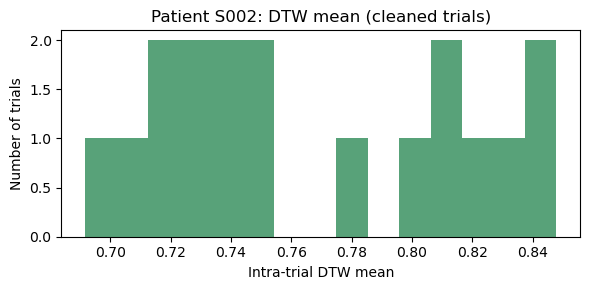

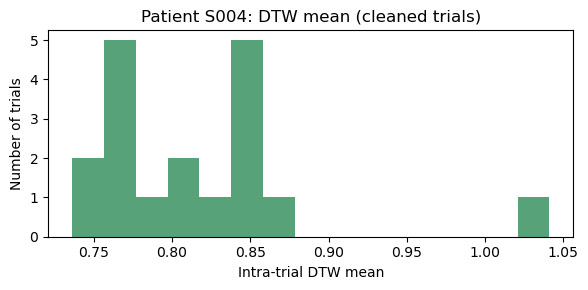

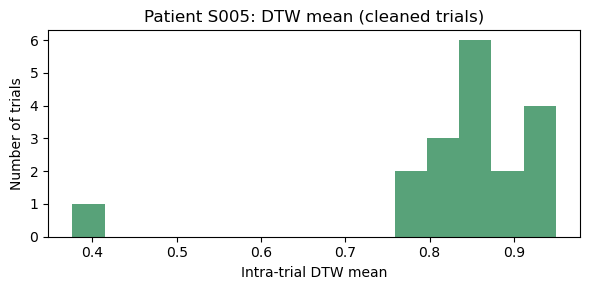

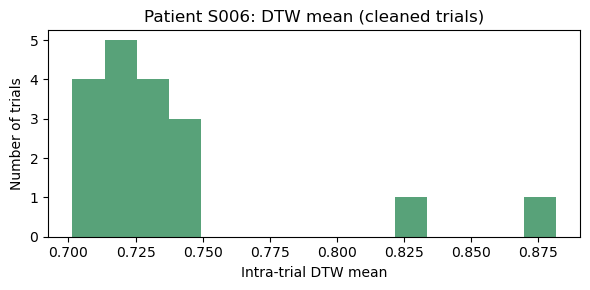

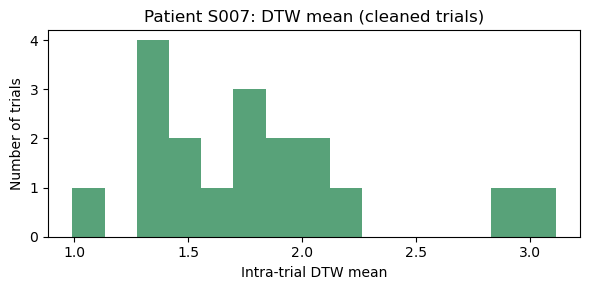

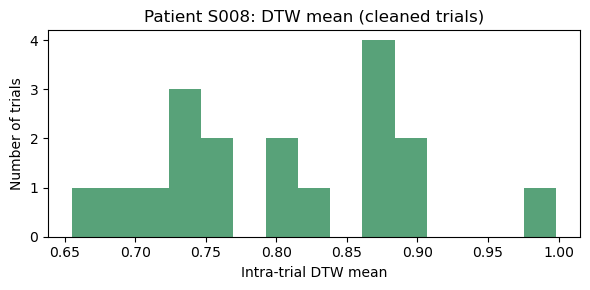

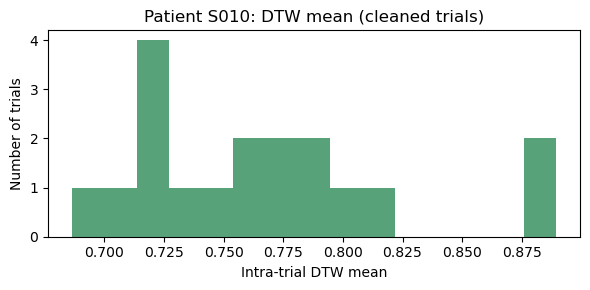

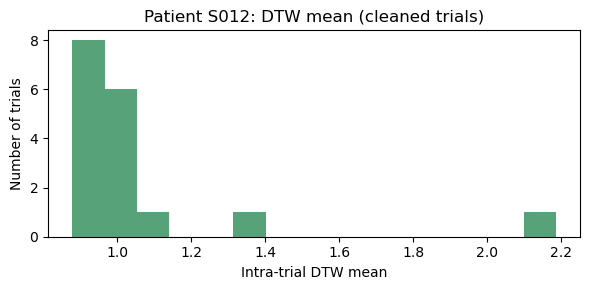

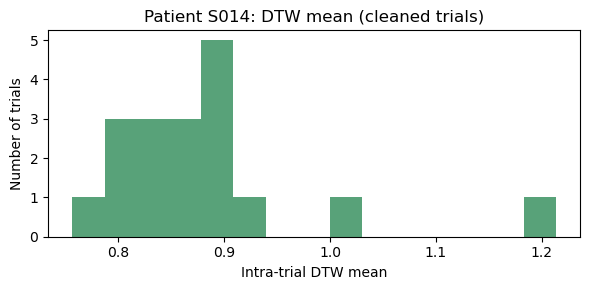

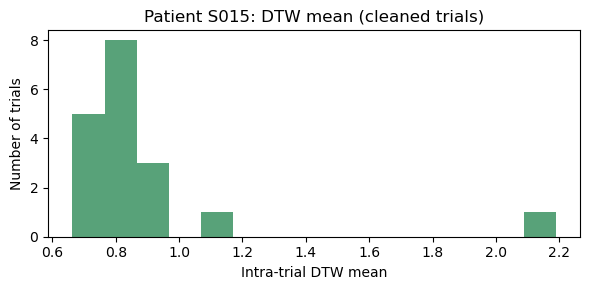

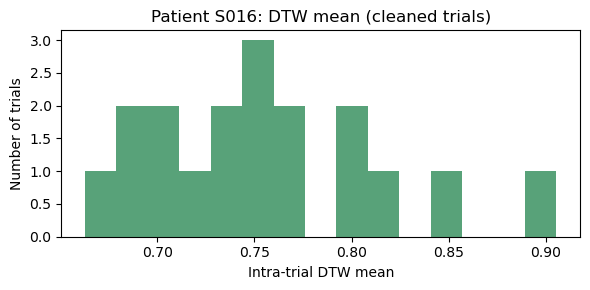

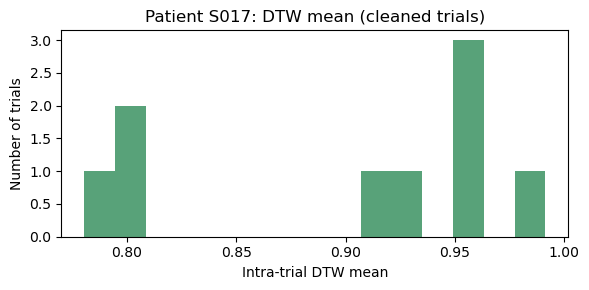

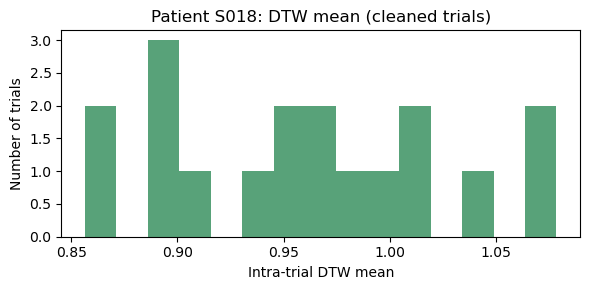

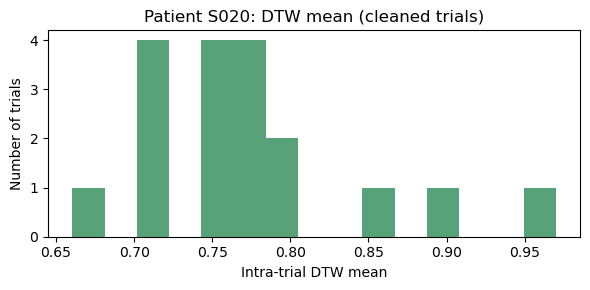

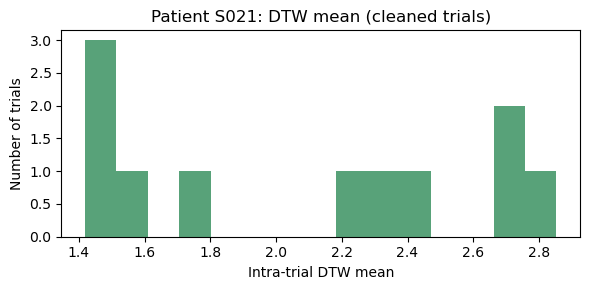

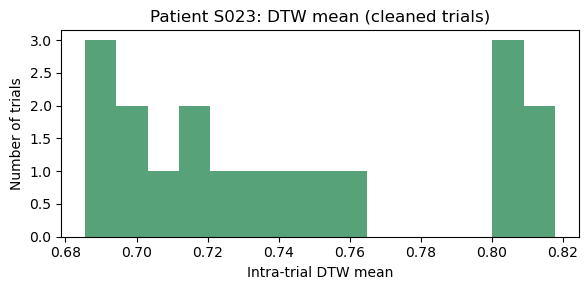

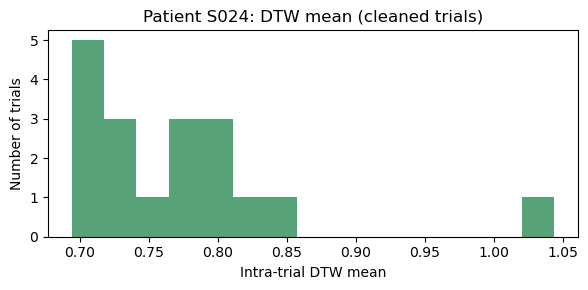

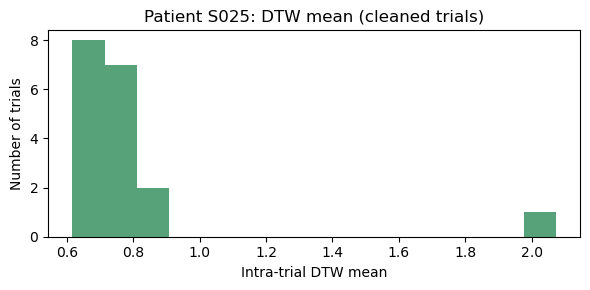

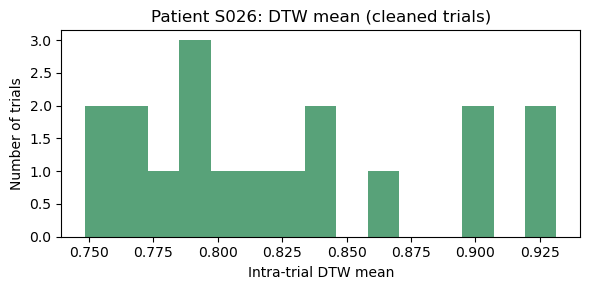

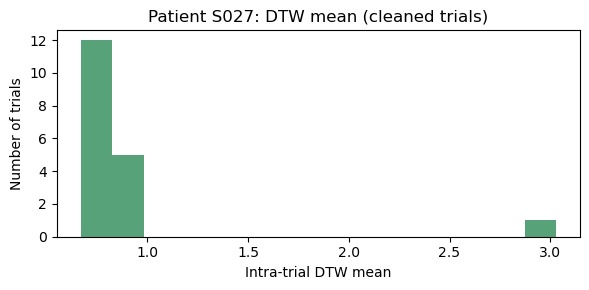

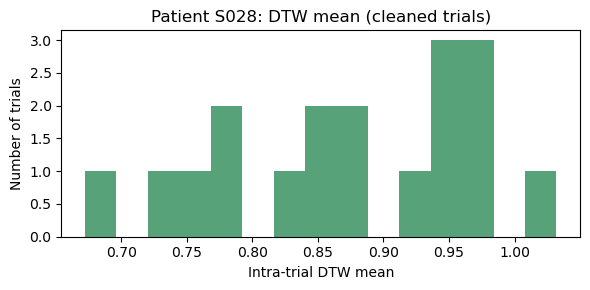

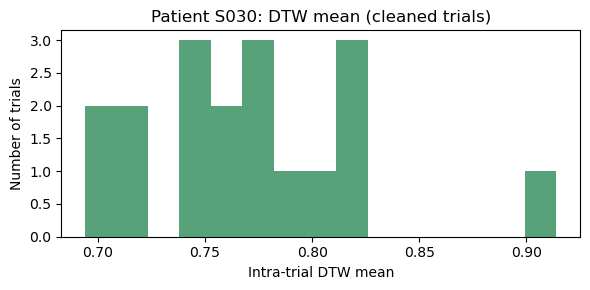

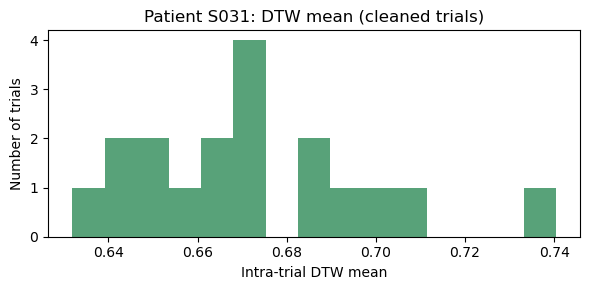

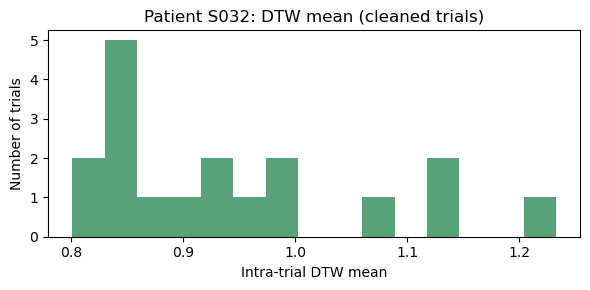

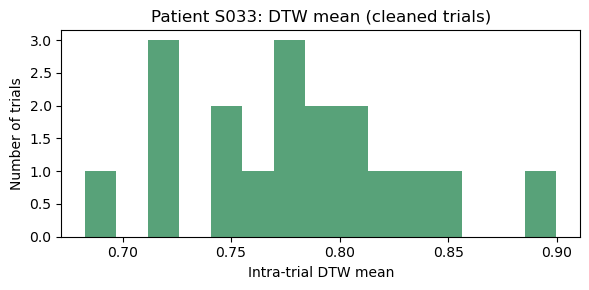

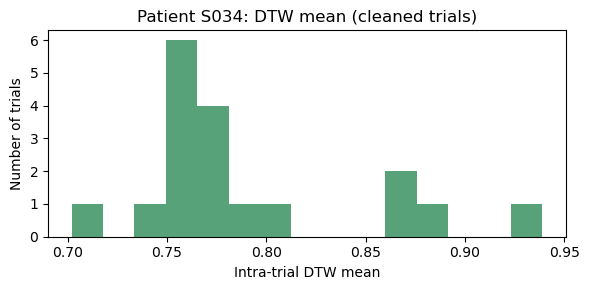

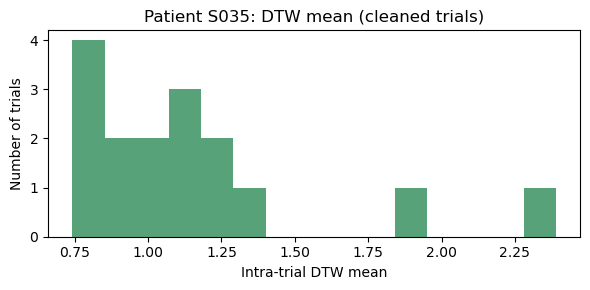

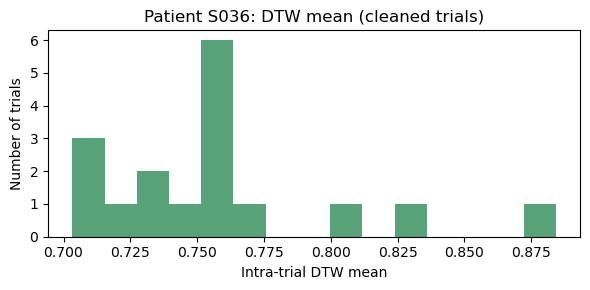

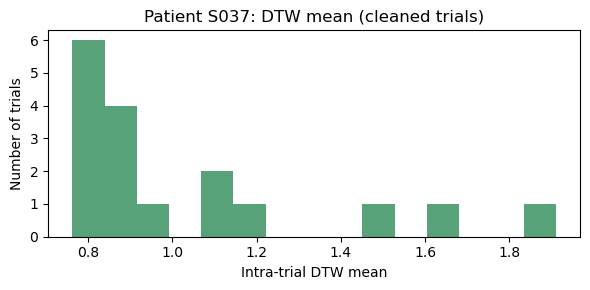

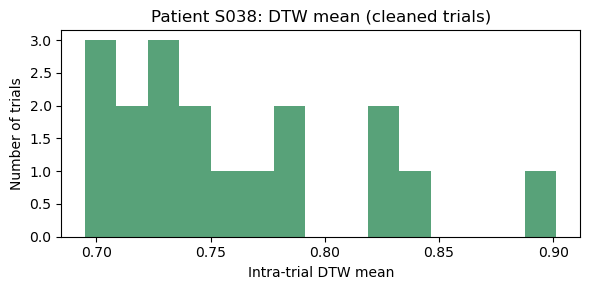

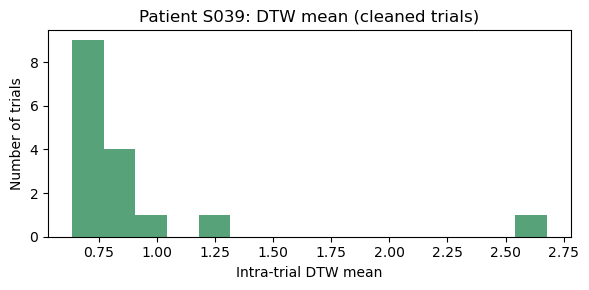

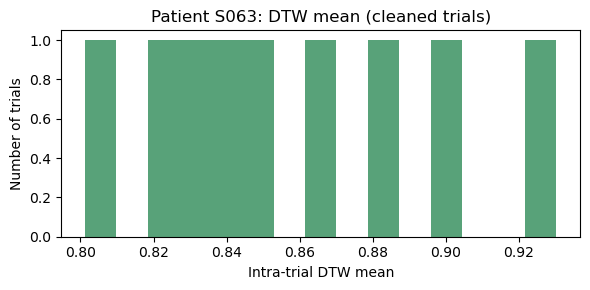

In [ ]:
#DTW Histogram per patient after cleaning 
df = pd.read_csv('DTW/cleaned_trials.csv')

for pid, group in df.groupby('patient_id'):
    plt.figure(figsize=(6, 3))
    plt.hist(group['mean'].dropna(), bins=15, color='seagreen', alpha=0.8)
    plt.title(f'Patient {pid}: DTW mean (cleaned trials)')
    plt.xlabel('Intra-trial DTW mean')
    plt.ylabel('Number of trials')
    plt.tight_layout()
    plt.show()


In [ ]:
# Compare before and after cleaning 
#Allows to visualize the effect of cleaning on the DTW mean values
df_all = pd.read_csv('DTW/dtw_intra_trial_stats.csv')
df_clean = pd.read_csv('DTW/cleaned_trials.csv')

erratic_patients = df_all[df_all['exclude']]['patient_id'].unique()

for pid in erratic_patients:
    plt.figure(figsize=(8, 4))
    before = df_all[df_all['patient_id'] == pid]['mean'].dropna()
    after  = df_clean[df_clean['patient_id'] == pid]['mean'].dropna()
    plt.hist(before, bins=15, alpha=0.6, label='Before cleaning', color='salmon')
    plt.hist(after,  bins=15, alpha=0.7, label='After cleaning', color='seagreen')
    plt.title(f'Patient {pid}: DTW mean (before vs after cleaning)')
    plt.xlabel('Intra-trial DTW mean')
    plt.ylabel('Number of trials')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# Compare between model patient and erratic patients 
df_clean = pd.read_csv('DTW/cleaned_trials.csv')
df_all = pd.read_csv('DTW/dtw_intra_trial_stats.csv')

# Model patient (with the lowest median DTW mean)
median_per_patient = df_clean.groupby('patient_id')['mean'].median()
modelo_pid = median_per_patient.idxmin()
modelo_means = df_clean[df_clean['patient_id'] == modelo_pid]['mean'].dropna()


erratic_patients = df_all[df_all['exclude']]['patient_id'].unique()

for pid in erratic_patients:
    plt.figure(figsize=(8, 4))
    patient_means = df_all[df_all['patient_id'] == pid]['mean'].dropna()
    plt.hist(modelo_means, bins=15, alpha=0.7, label=f'Patient Modelo: {modelo_pid}', color='royalblue')
    plt.hist(patient_means, bins=15, alpha=0.7, label=f'Erratic patient: {pid}', color='darkorange')
    plt.title(f'Comparison: Modelo vs Erratic Patient {pid}')
    plt.xlabel('Intra-trial DTW mean')
    plt.ylabel('Number of trials')
    plt.legend()
    plt.tight_layout()
    plt.show()

## Analysis for the Raw signal without segmentation 

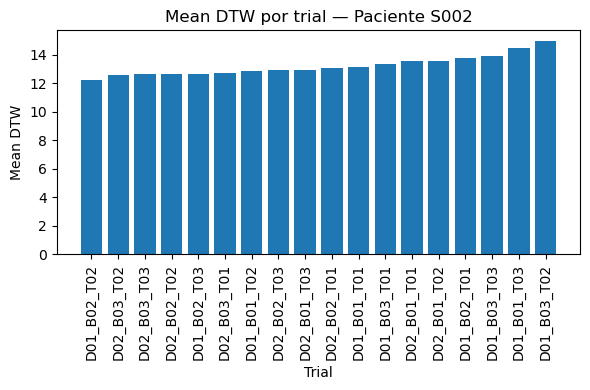

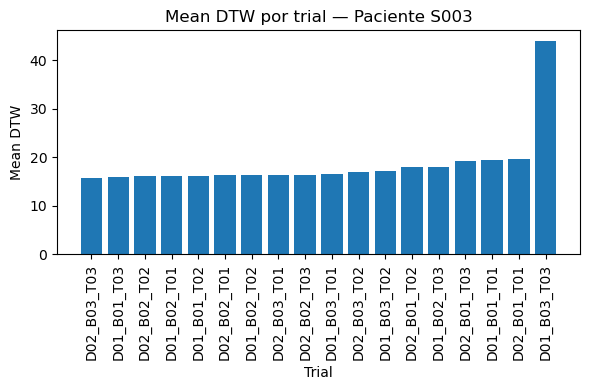

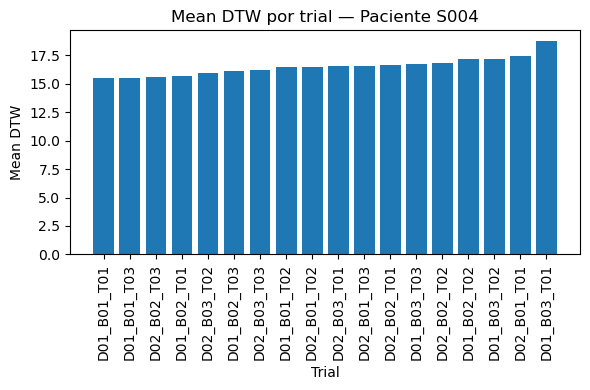

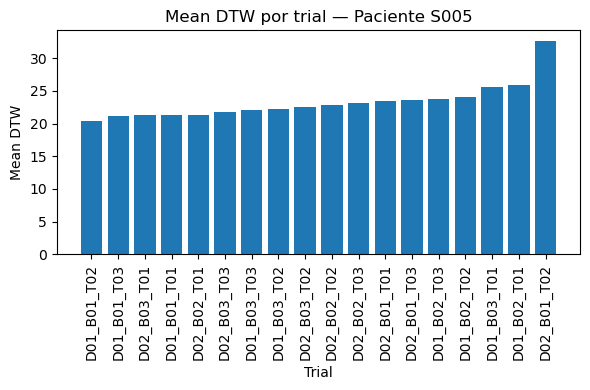

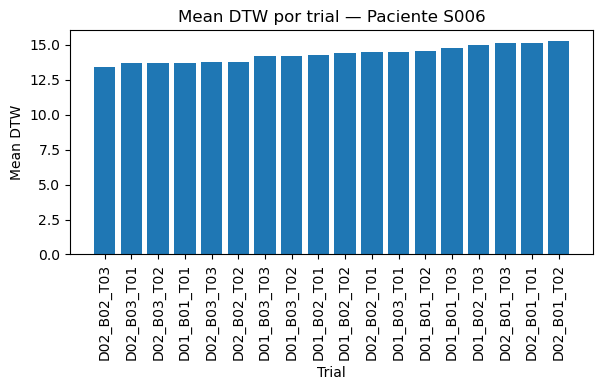

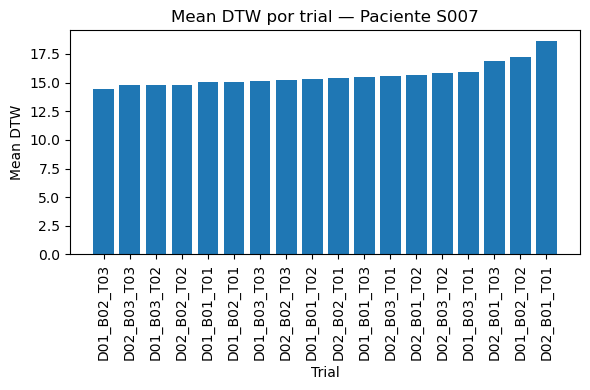

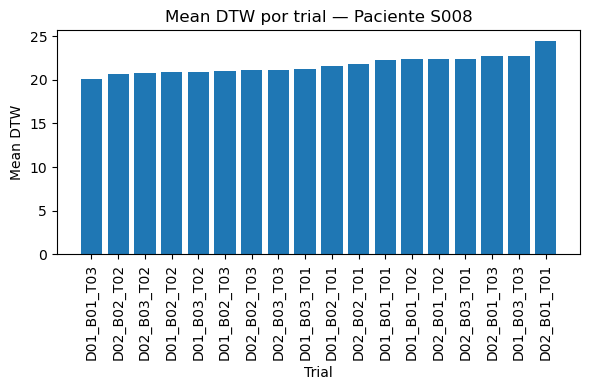

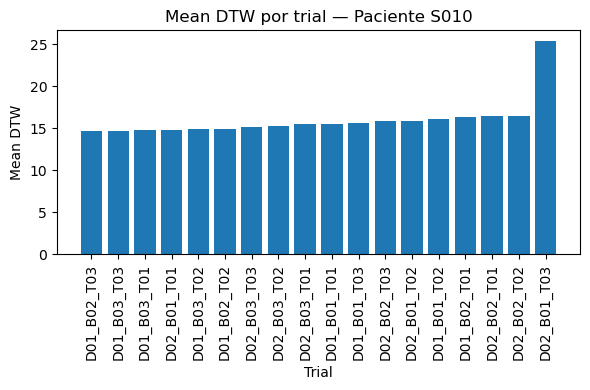

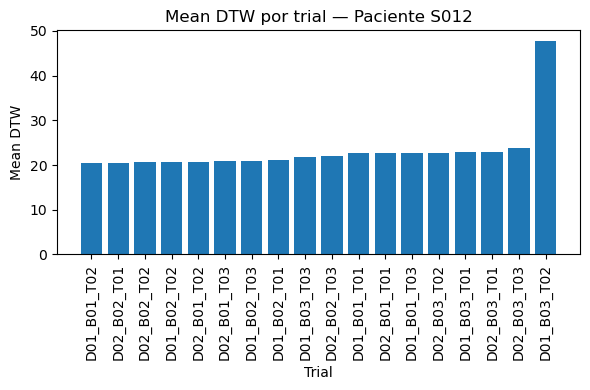

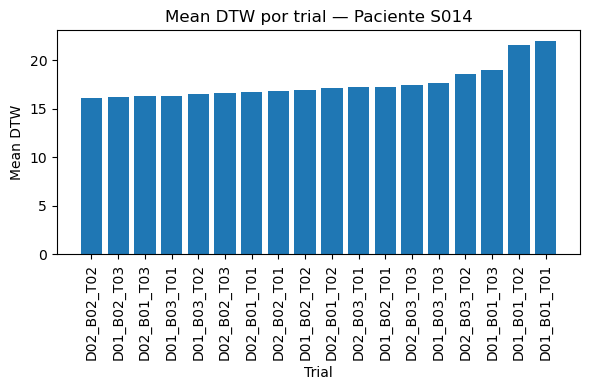

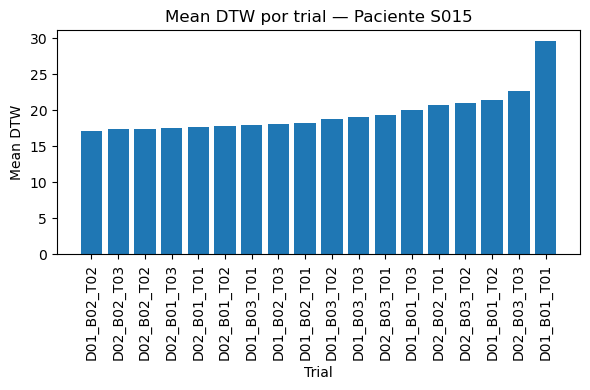

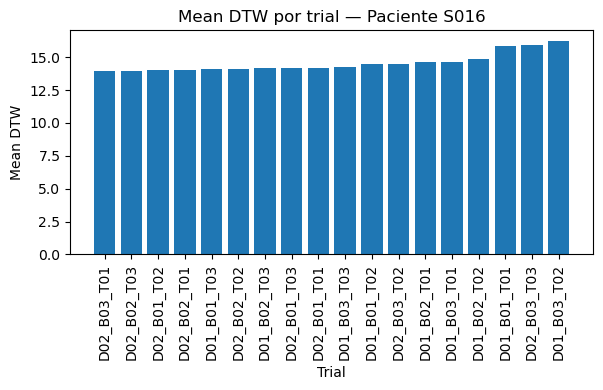

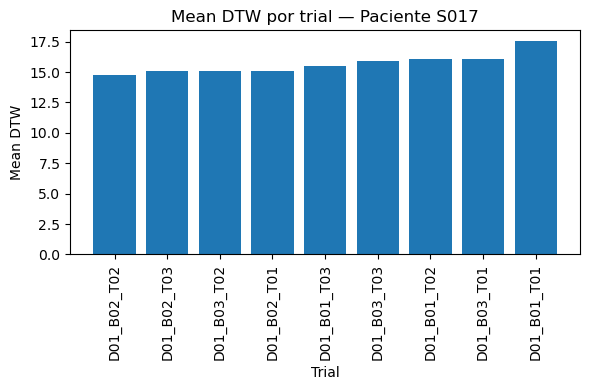

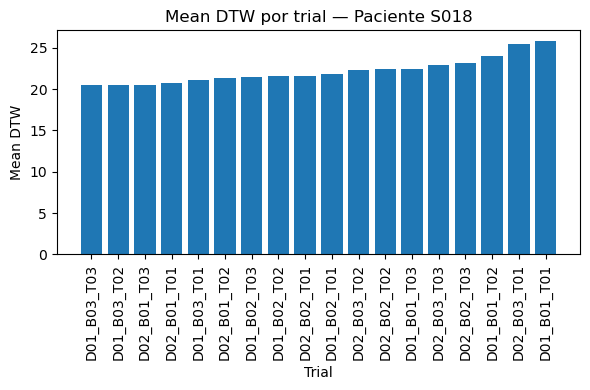

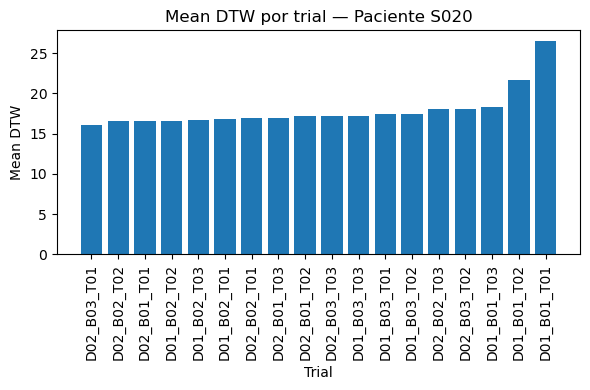

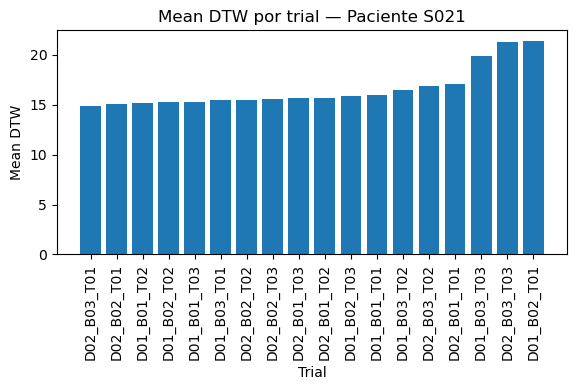

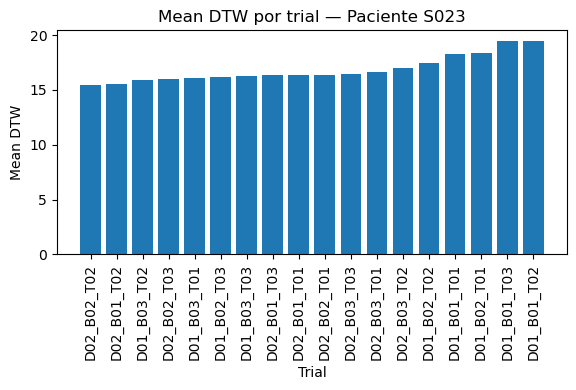

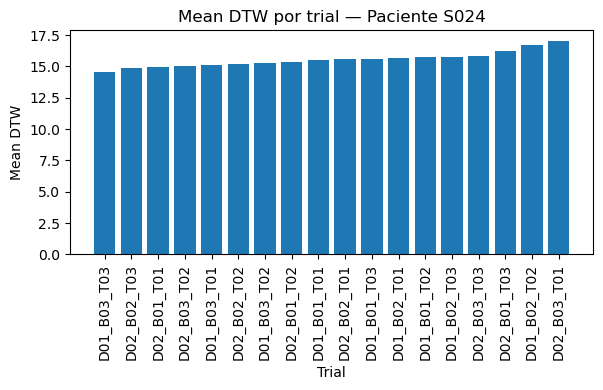

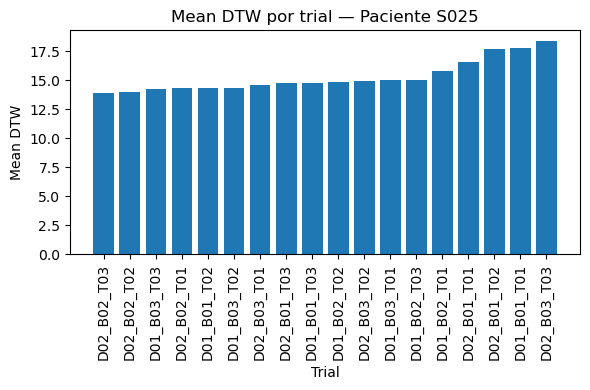

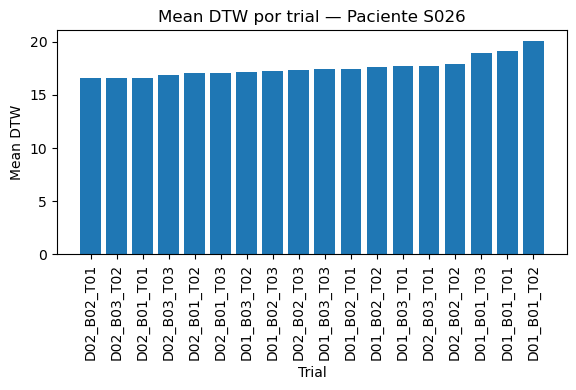

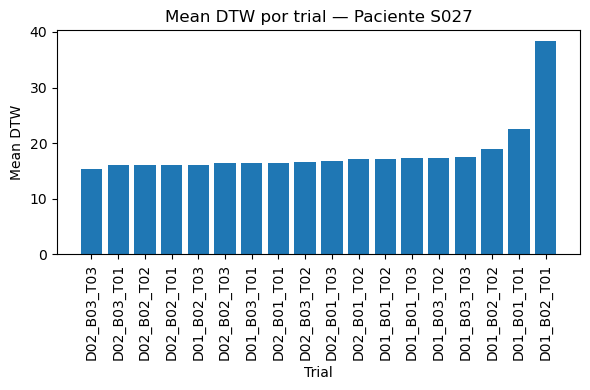

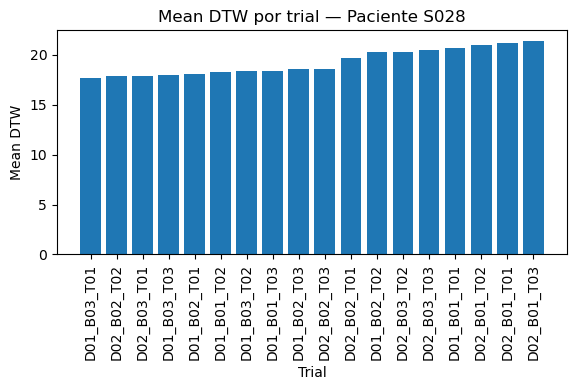

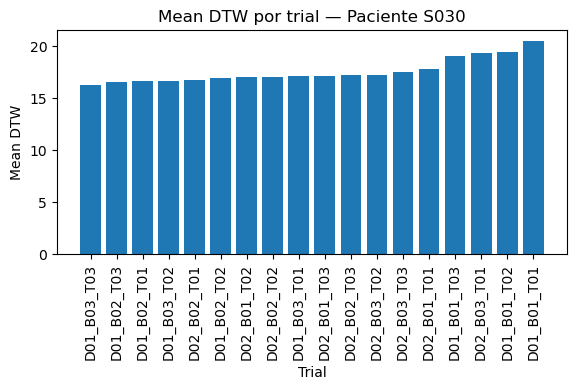

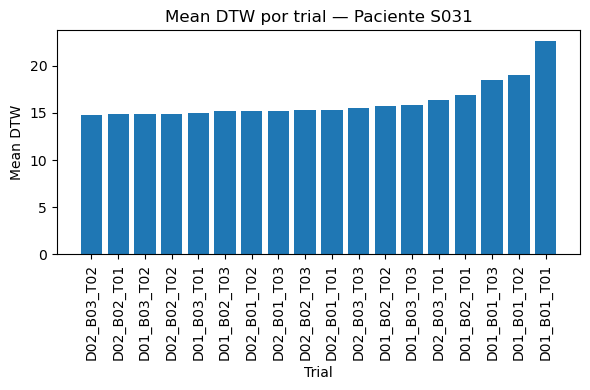

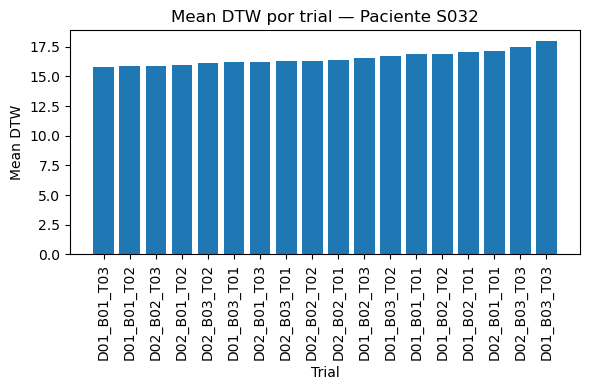

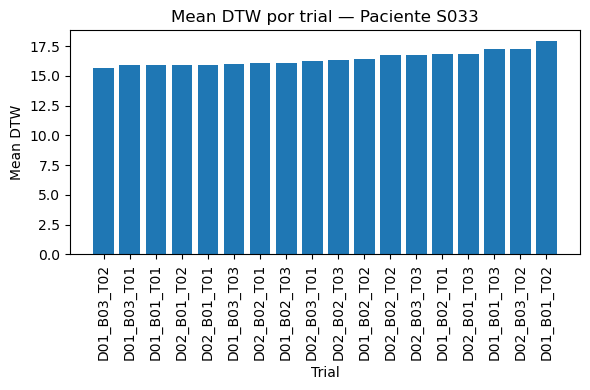

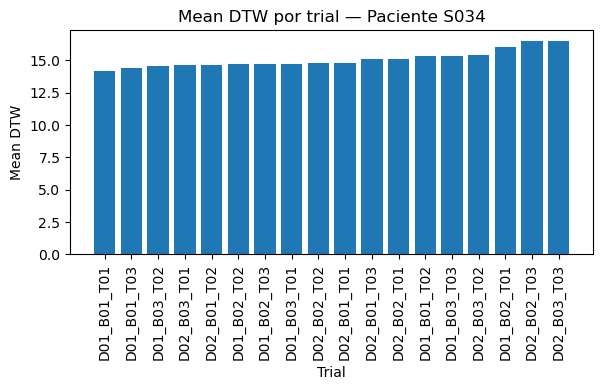

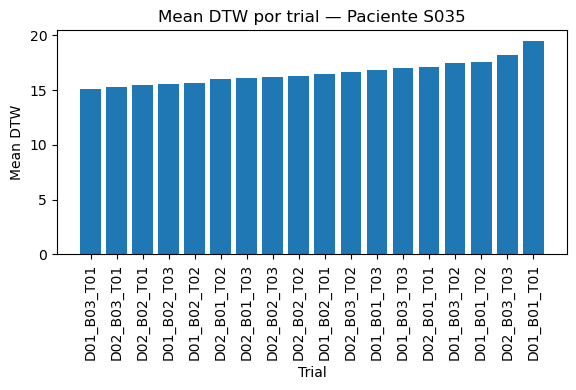

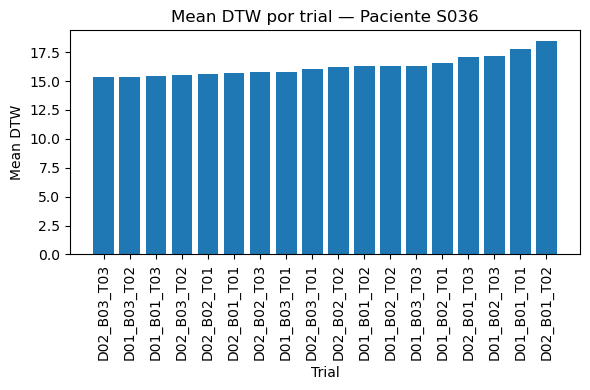

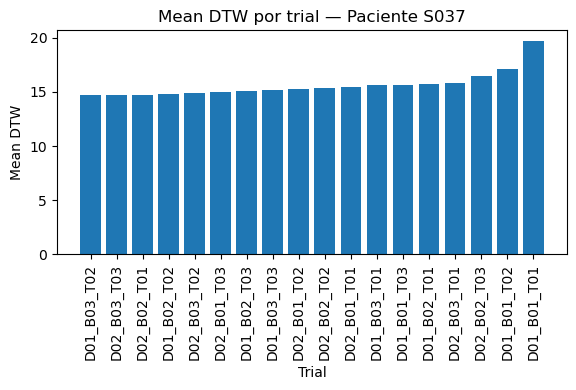

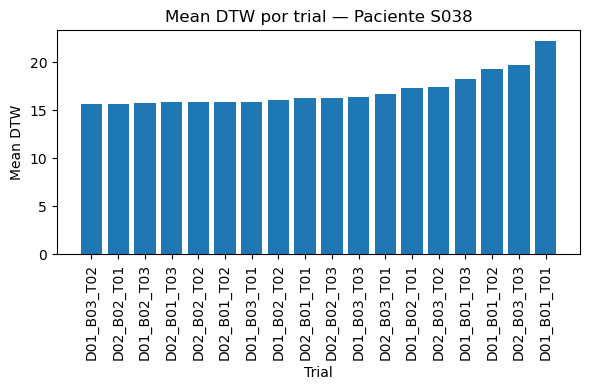

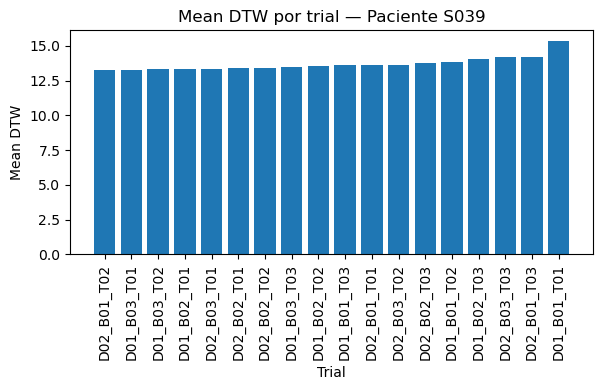

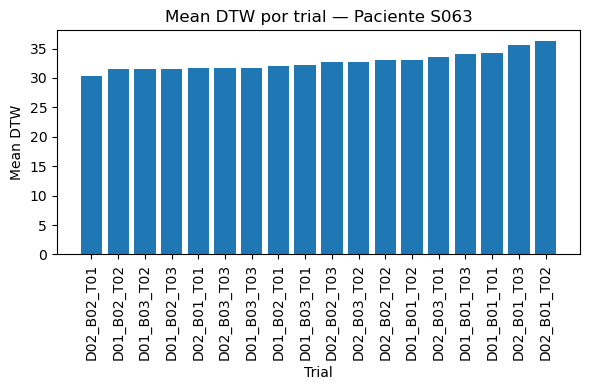

<Figure size 600x400 with 0 Axes>

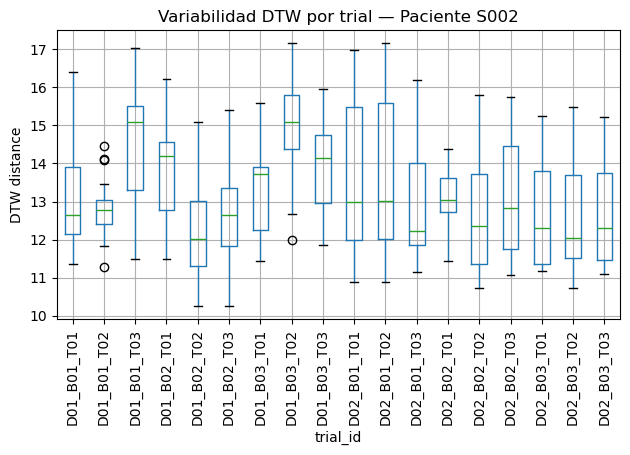

<Figure size 600x400 with 0 Axes>

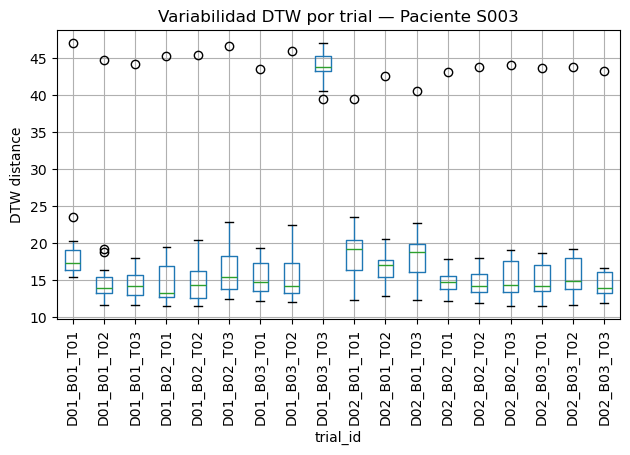

<Figure size 600x400 with 0 Axes>

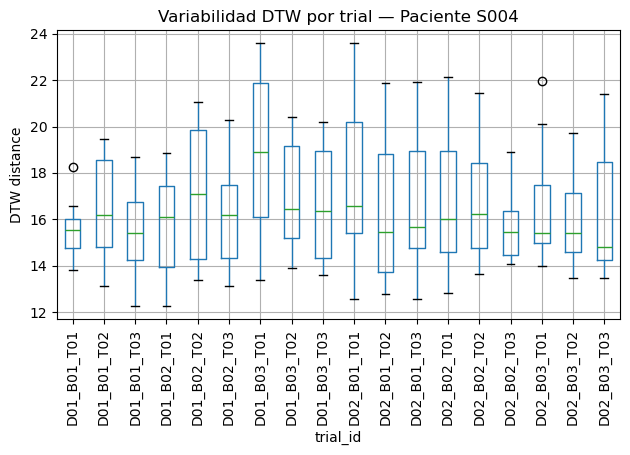

<Figure size 600x400 with 0 Axes>

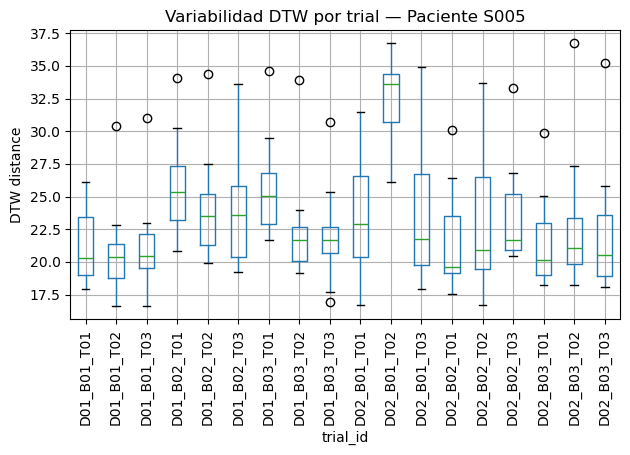

<Figure size 600x400 with 0 Axes>

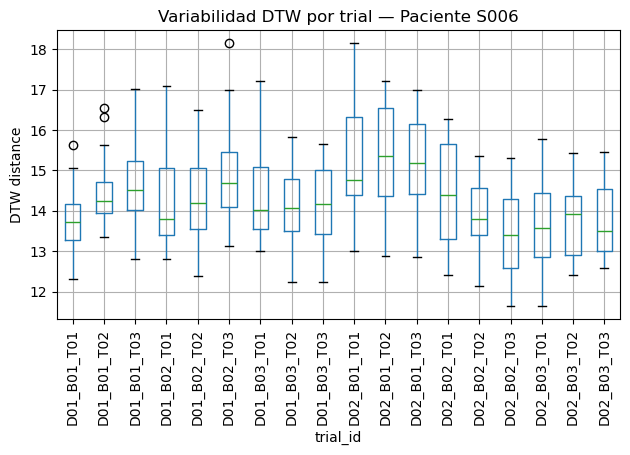

<Figure size 600x400 with 0 Axes>

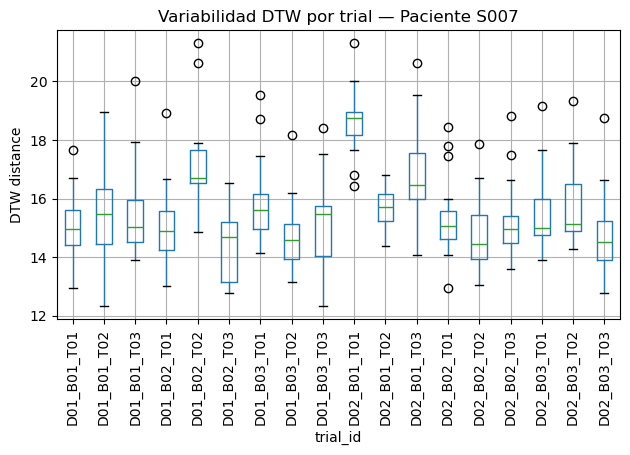

<Figure size 600x400 with 0 Axes>

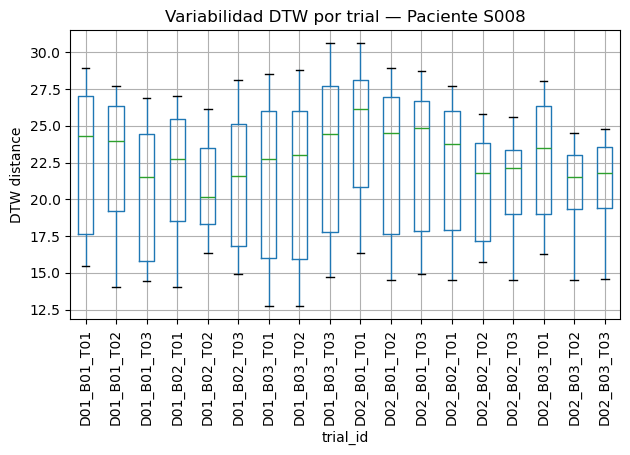

<Figure size 600x400 with 0 Axes>

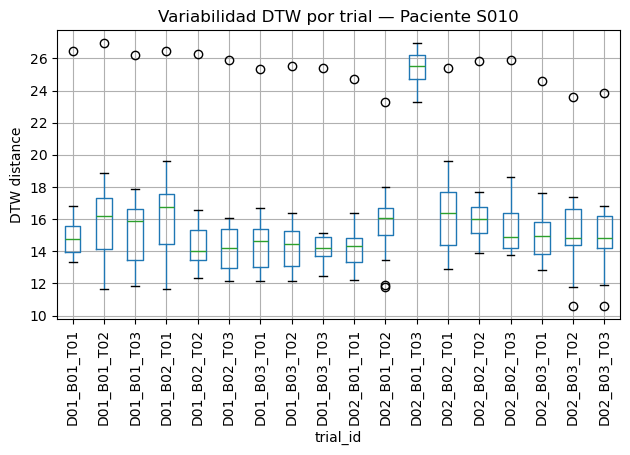

<Figure size 600x400 with 0 Axes>

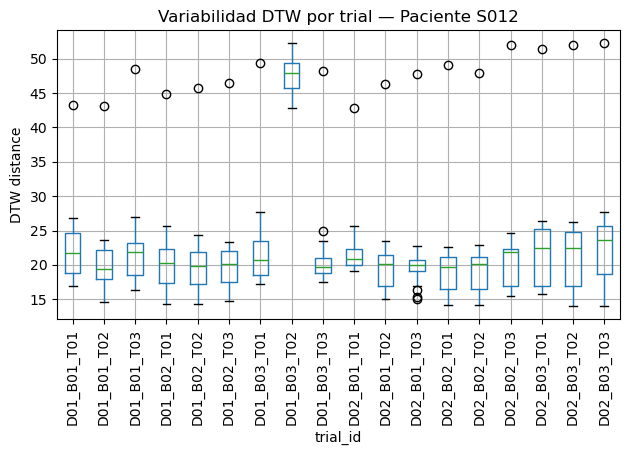

<Figure size 600x400 with 0 Axes>

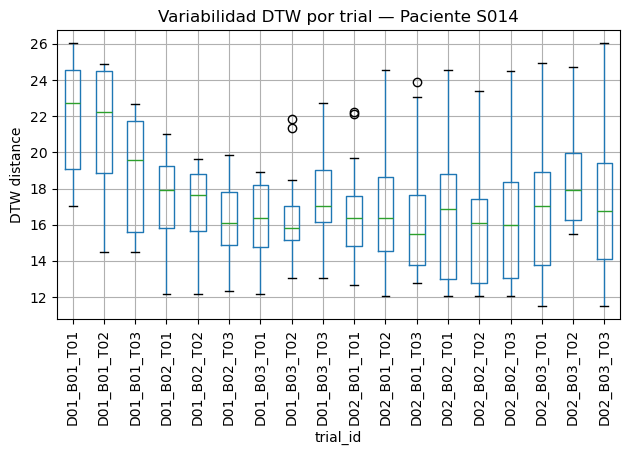

<Figure size 600x400 with 0 Axes>

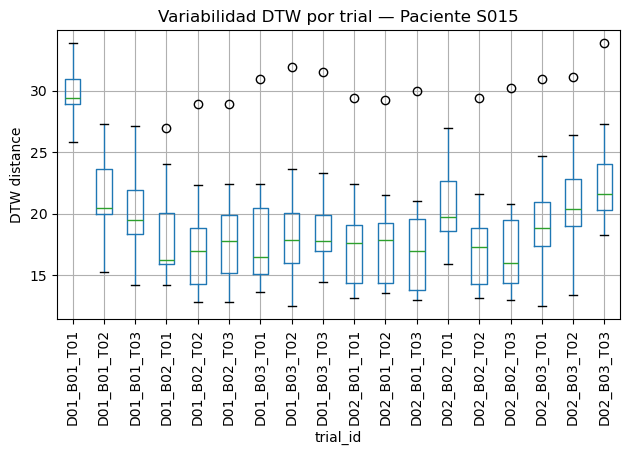

<Figure size 600x400 with 0 Axes>

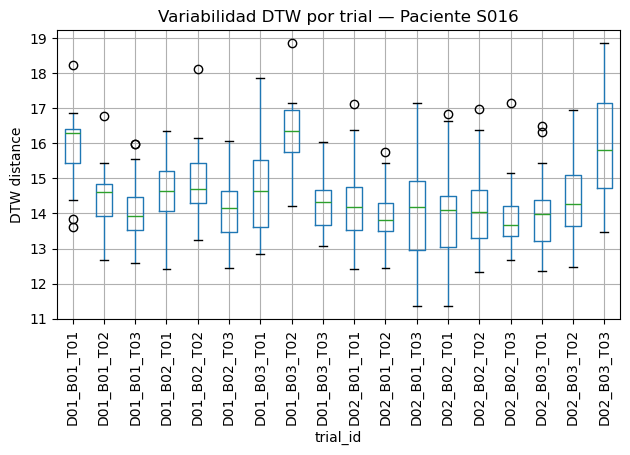

<Figure size 600x400 with 0 Axes>

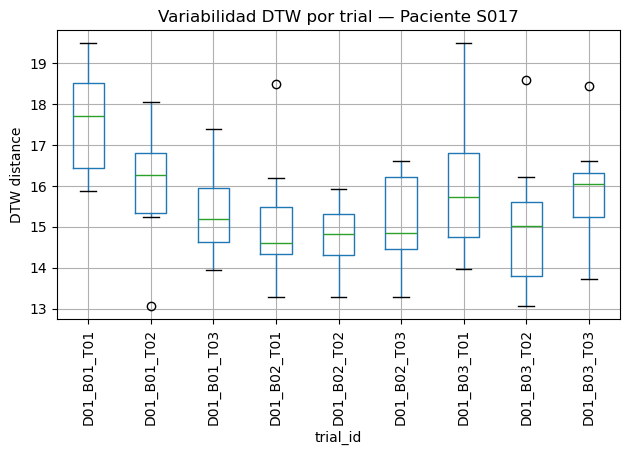

<Figure size 600x400 with 0 Axes>

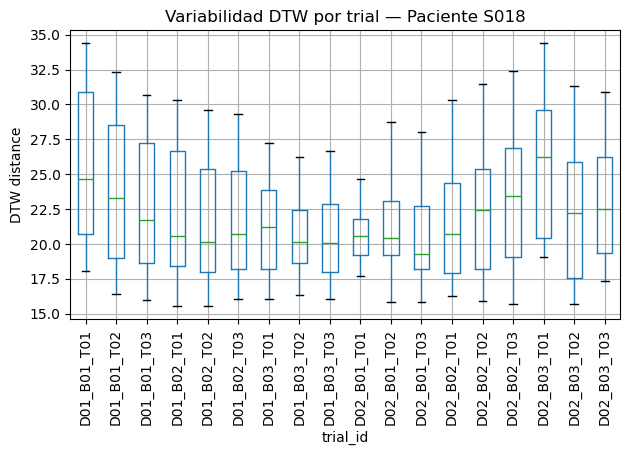

<Figure size 600x400 with 0 Axes>

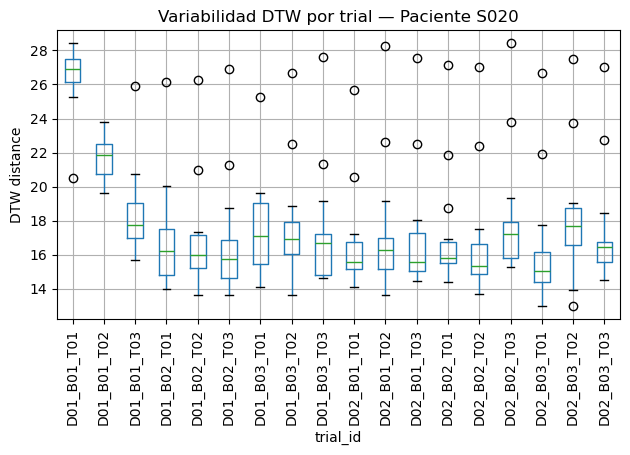

<Figure size 600x400 with 0 Axes>

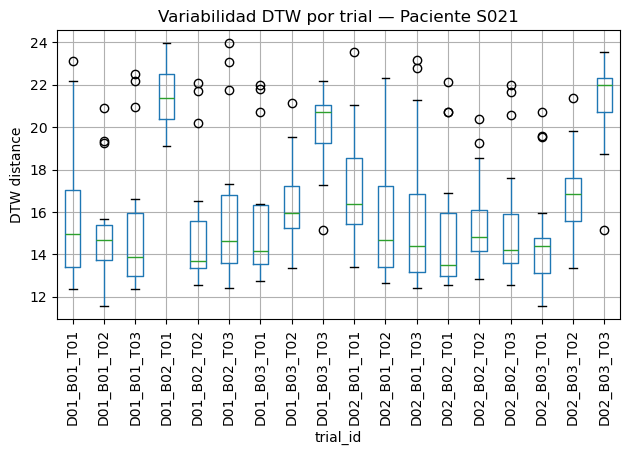

<Figure size 600x400 with 0 Axes>

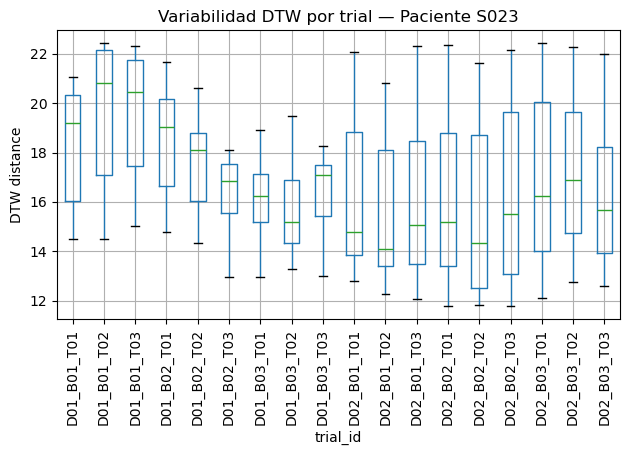

<Figure size 600x400 with 0 Axes>

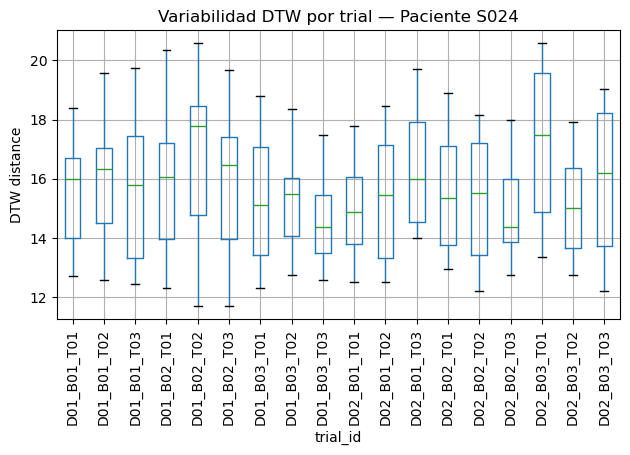

<Figure size 600x400 with 0 Axes>

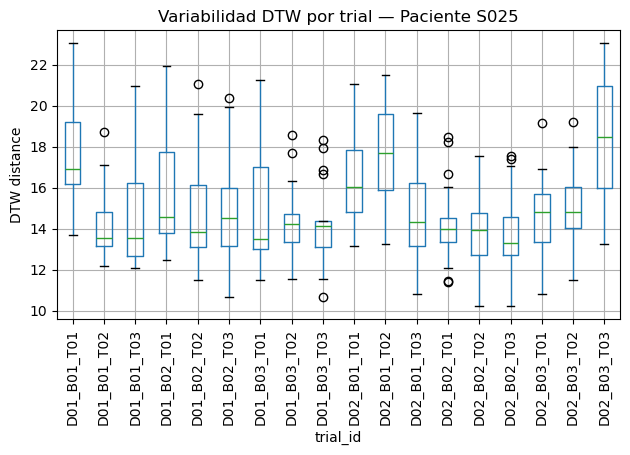

<Figure size 600x400 with 0 Axes>

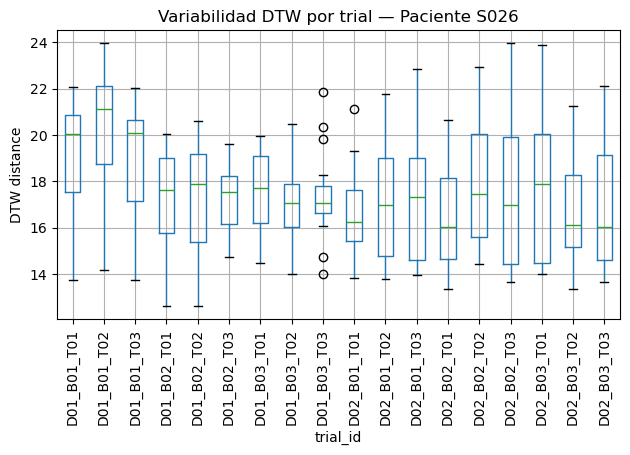

<Figure size 600x400 with 0 Axes>

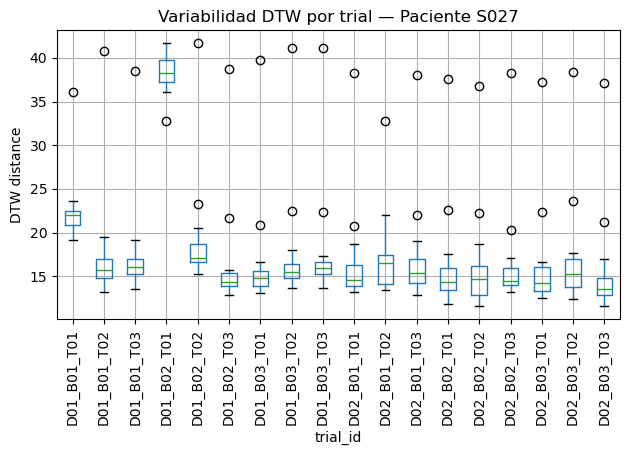

<Figure size 600x400 with 0 Axes>

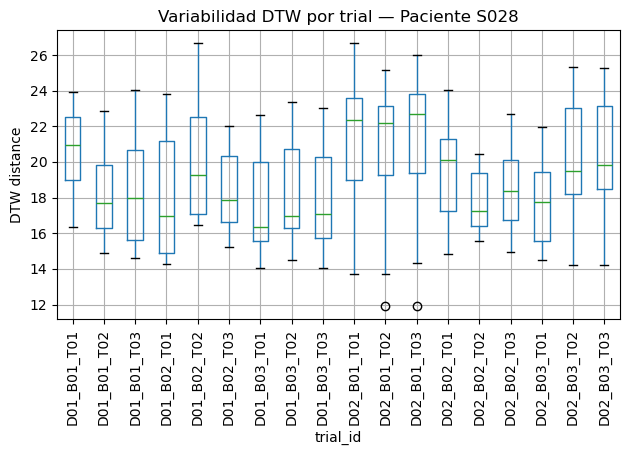

<Figure size 600x400 with 0 Axes>

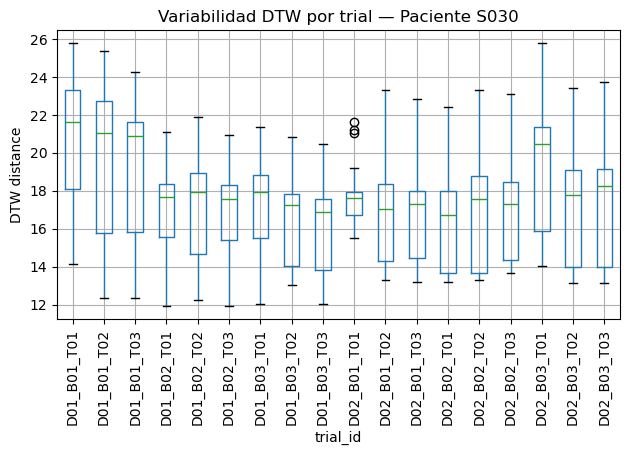

<Figure size 600x400 with 0 Axes>

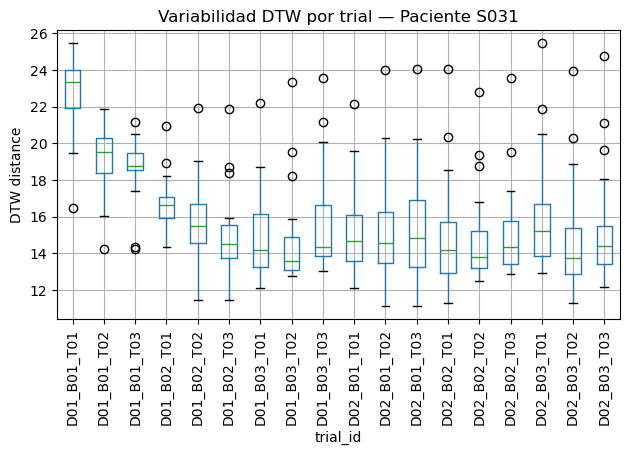

<Figure size 600x400 with 0 Axes>

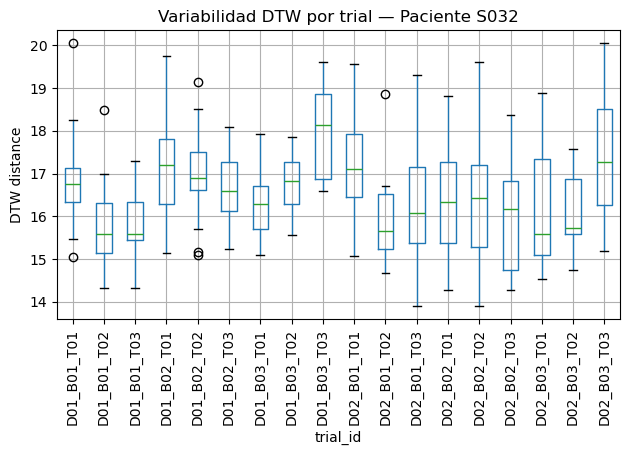

<Figure size 600x400 with 0 Axes>

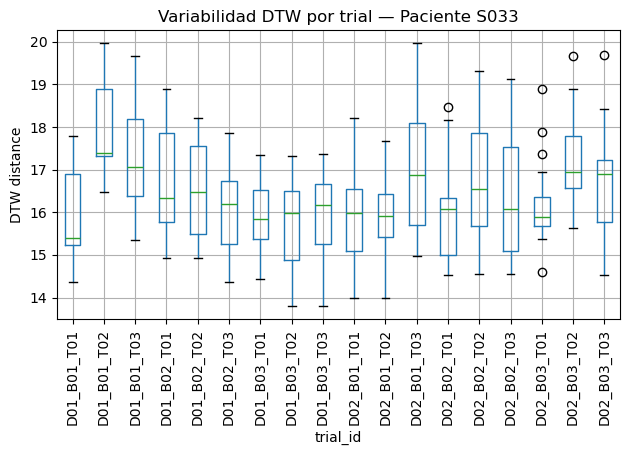

<Figure size 600x400 with 0 Axes>

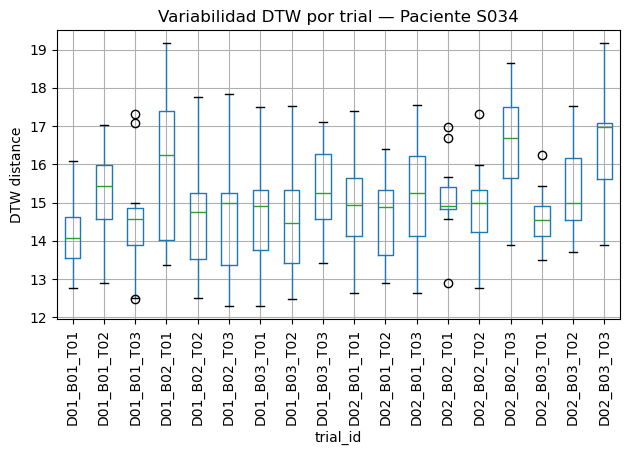

<Figure size 600x400 with 0 Axes>

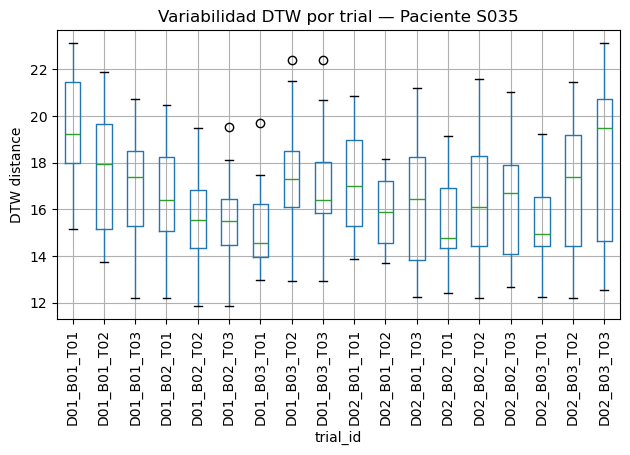

<Figure size 600x400 with 0 Axes>

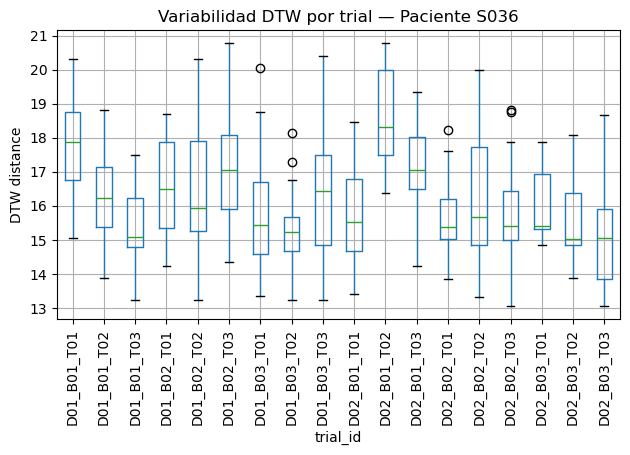

<Figure size 600x400 with 0 Axes>

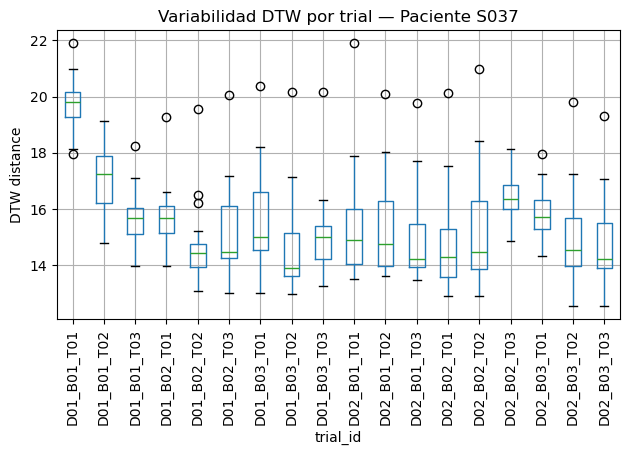

<Figure size 600x400 with 0 Axes>

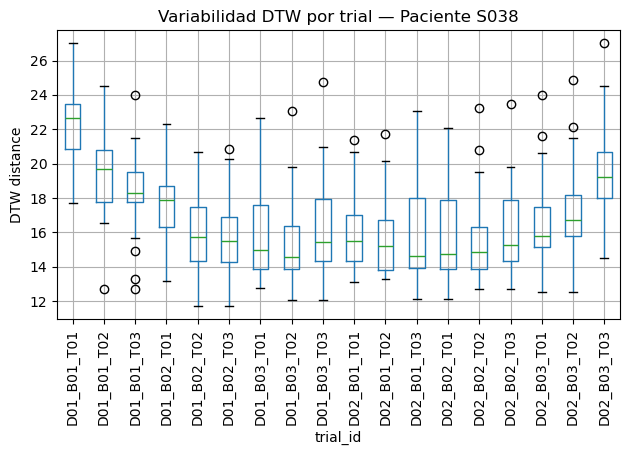

<Figure size 600x400 with 0 Axes>

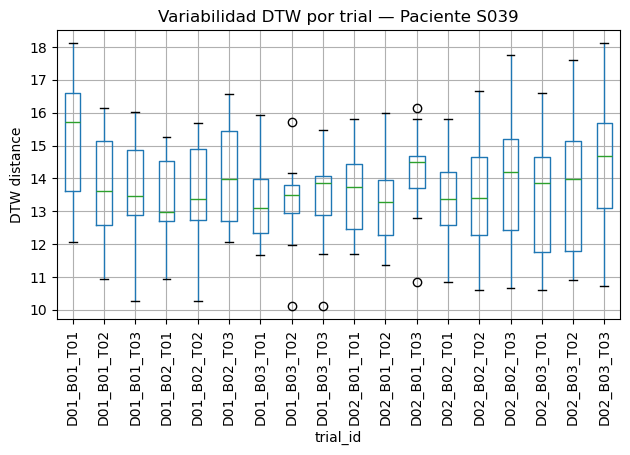

<Figure size 600x400 with 0 Axes>

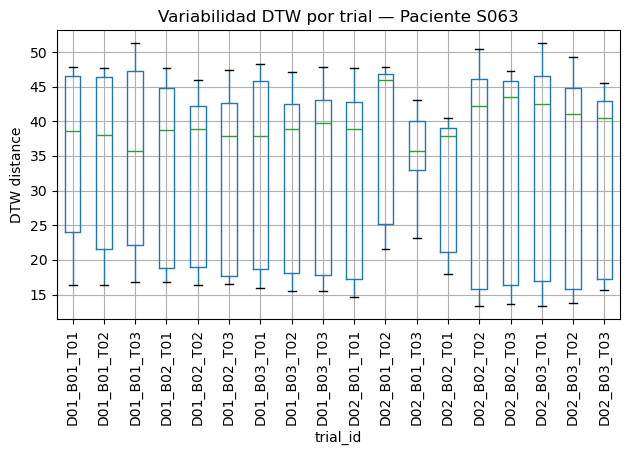

In [4]:
#Analysis for DTW not segmented
df = pd.read_csv('DTW/dtw_ns_normalized_G01.csv')

records = []
for pid, sub in df.groupby('patient_id'):
    # for each patient, create a record for each trial pair
    for _, row in sub.iterrows():
        records.append({'patient_id': pid,
                        'trial_id': row['trial_i'],
                        'dtw': row['dtw_distance']})
        records.append({'patient_id': pid,
                        'trial_id': row['trial_j'],
                        'dtw': row['dtw_distance']})

df_long = pd.DataFrame(records)

# Group by patient and trial, calculating DTW statistics
summary = df_long.groupby(['patient_id','trial_id'])['dtw'].agg(
    MeanDTW = 'mean',
    MedDTW  = 'median',
    StdDTW  = 'std',
    MaxDTW  = 'max',
    MinDTW  = 'min',
    Count   = 'count'
).reset_index()


for pid in summary['patient_id'].unique():
    dfp = summary[summary['patient_id']==pid].sort_values('MeanDTW')
    plt.figure(figsize=(6,4))
    labels = [re.sub(r'^.*?(D.*)$', r'\1', tid) for tid in dfp['trial_id']]
    plt.bar(labels, dfp['MeanDTW'])
    plt.title(f'Mean DTW por trial — Paciente {pid}')
    plt.xlabel('Trial')
    plt.ylabel('Mean DTW')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

for pid in df_long['patient_id'].unique():
    plt.figure(figsize=(6,4))
    dfp = df_long[df_long['patient_id']==pid]
    box = dfp.boxplot(column='dtw', by='trial_id', rot=90)
    labels = [re.sub(r'^.*?(D.*)$', r'\1', label.get_text()) for label in box.get_xticklabels()]
    box.set_xticklabels(labels, rotation=90)
    plt.title(f'Variabilidad DTW por trial — Paciente {pid}')
    plt.suptitle('')
    plt.ylabel('DTW distance')
    plt.tight_layout()
    plt.show()

